# Starbucks Capstone Project


## Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks.Not all users receive the same offer.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

The transactional data shows user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.



## CRISP – DM methodology

CRISP-DM stands for cross-industry process for data mining. The CRISP-DM methodology provides a structured approach to planning a data mining project. It's an open standard for anyone to use, which was developed by cooperation with over 200 organizations. It was developed specifically for data mining; however, it is flexible enough to be applied to many analytic styles.
 
The CRISP-DM process model has six major phases:
* Business Understanding: To have a good understanding of the business problem that is to be solved and addressing the goals and objectives. 
* Data Understanding: Inspect the data and gain a better understanding about the data to evaluate them.
* Data Preparation: Modify data to a state such that it is fit for analysis. 
* Modeling:  Develop analytical techniques to develop a good model that can be presented to the business. 
* Validation: Compare the models and find the best one that can be implemented.
* Visualization & Presentation:  Present the final model to the Business such that it can be integrated to everyday business.






# 2. Data Understandng:


### Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record


#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import math
import json


from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer, MinMaxScaler
import seaborn as sns #For Data visualization
import matplotlib.pyplot as plt #Data plotting and visualization
sns.set_palette(sns.color_palette('Accent'))
import plotly.express as px
%matplotlib inline


from datetime import datetime
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.cluster import KMeans

In [3]:
#Starbucks color code 

starbucks = ["#008248", "#604c4c", "#eac784", "#f0cddb", "#6B9997"]
starbucks_1=  ["#008248", "#604c4c", "#eac784", "#f0cddb", "#6B9997"]
starbucks_d = ["#cce6da", "#66b491", "#008248"]

#### Data Loading

In [4]:
# Importing the data from json file

portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)

profile = pd.read_json('data/profile.json', orient='records', lines=True)

transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

#### a. Portfolio Data


In [5]:
#Glimpse of Portfolio data
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [6]:
#Info of portfolio data
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [7]:
#Discription of Protfolio Data
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [8]:
#Duplicat eand Null values check

print('No of Duplicate values =',portfolio['id'].duplicated().sum())
print('\n')
print('No of Null values\n\n', portfolio.isna().sum())

No of Duplicate values = 0


No of Null values

 reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64


#### b. Profile Data

In [9]:
#Glimpse of Profile data
profile.sample(10)

,gender,age,id,became_member_on,income
13453,M,20,30e1c4e2158a4aed8656781077bfe1fc,20180131,50000.0
966,None,118,eaf82df1ddce4a1e87dbd946ffbf4a39,20180123,NaN
5334,F,58,686337f3cd1d4f548af8dcf79b727954,20170204,86000.0
9380,None,118,c5ecd92a7d1f442fb098df6d6ab8a3e5,20160429,NaN
14377,M,29,2afddead3edc4fcd9c6c1840c3de2950,20171118,30000.0
8488,M,22,d067d8e01e314ba390b05e000775eadd,20140608,50000.0
11978,M,51,15da75aeaaa14963b2caaf00d3f69457,20160415,48000.0
7186,M,51,d3ae1f0e0eb841dfbaa22b1ee6901faf,20150405,36000.0
7432,F,60,0e1d61a719e54bf596e45f1b4948b3d0,20170613,96000.0
12703,M,82,37aafe9fc59444e3b10a36ad9e6eb406,20180326,81000.0


In [10]:
#Info of Profile data
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [11]:
#Discription of Profile Data
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


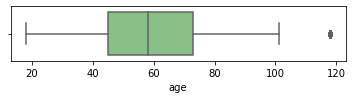

In [12]:
#Box plot for age distribution

plt.figure(figsize=[6,1])
sns.boxplot(data=profile, x='age')
sns.set_palette(sns.color_palette(starbucks,1))

There seems to be few very haigh values for age(eg: 118 yrs). This is  likely to be an erronious data. 

In [13]:
#Duplicate and Null values check

print('No of Duplicate values =',profile['id'].duplicated().sum())
print('\n')
print('No of Null values\n\n', profile.isna().sum())
print('\n')
# Checking percentage of null values
print('\nPercentage of missing data: ', round((profile.gender.isna().sum()*100 / profile.shape[0]),2),'%')

No of Duplicate values = 0


No of Null values

 gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64



Percentage of missing data:  12.79 %


<AxesSubplot:>

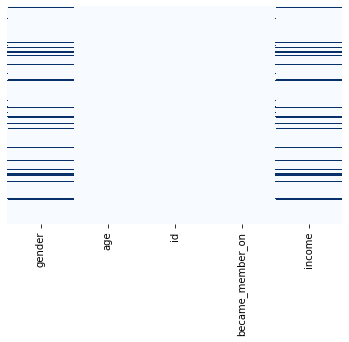

In [14]:
# Visualize Missing Data
sns.heatmap(profile.isnull(), yticklabels = False, cbar = False, cmap="Blues")

#### c. Transcript Data

In [15]:
#Glimpse of Profile data
transcript.sample(10)

,person,event,value,time
187335,a4ef66feebf34cbd961d2f557a13b4ec,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},456
28346,dc71eebf1112489987b78e2d7a621745,transaction,{'amount': 1.29},42
187069,9773a632734541e28fa06a6260e218ed,transaction,{'amount': 20.96},450
171067,f8f608c3227a4398bad5dc1b6b692578,transaction,{'amount': 13.01},414
229608,1a2c6fd57fad4250b35c1b0903ed34ea,transaction,{'amount': 5.62},528
266249,fc546aaa32694c5cadfc43b97b563434,offer viewed,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},588
256908,d4821a5e60674cceaee0d2df7b46b7cf,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},576
78987,366fe99ee1c14def823cae2c5df14fb8,transaction,{'amount': 9.13},192
175140,84163a1b1490474e9bab09607df67c9c,offer viewed,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},426
82989,43fbc1418ee14268a5d3797006cc69be,transaction,{'amount': 21.32},204


In [16]:
#Info of Profile data
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [17]:
#Discription of Profile Data
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [18]:
#Null values check

print('No of Null values\n', transcript.isna().sum())
print('\n')

No of Null values
 person    0
event     0
value     0
time      0
dtype: int64




# 3. Data Preparation

In the Data preparation phase we are going to do the following:

1. Perform data cleaning of Portfolio, Profile and Transcript data, and create new variables when necessary. this will be used for the initial data exploration. 


2. Combine data from Portfolio, Profile and Transcript data, aggregate Offer recieved, viewed and completed in the user level and then create new features. This will be used for the final analysis.

### Portfolio

* 'Channels' colum is in the form of list. 
* Rename column name to make it consistant actoss all datasets.
* Create a column offer_name, assign a recogonizable identifyer


In [19]:
def clean_portfolio(portfolio=portfolio):
    '''
    INPUT:
    portfolio - (pandas dataframe), portfolio data
    
    OUTPUT:
    portfolio - (pandas dataframe), cleaned portfolio data

    
    Description:
    This function cleans the data and provides a DatFrame with Offer ID and other data about the offer. 
    '''    
    new_col_names_portfolio = {'difficulty':'offer_difficulty' , 'id':'offer_id', 
                 'duration':'offer_duration', 'reward': 'offer_reward'}
    portfolio  = portfolio.rename(columns= new_col_names_portfolio )
    
    
    #Create new column Offer name to assign a recogonizable identifyer for each of the 10 offers. 
    new_col = {'offer_name' : ['offer_1', 'offer_2','offer_3','offer_4',
                              'offer_5','offer_6','offer_7','offer_8','offer_9','offer_10' ]}
    portfolio['offer_name'] = pd.DataFrame(new_col)
    
    # One hot encode the 'offertype' column
    #offertype = pd.get_dummies(portfolio['offer_type'])
    
    # One hot encode the 'channels' columns
    mlb = MultiLabelBinarizer()
    mlb_fit = mlb.fit(portfolio['channels'])
    channels_df = pd.DataFrame(mlb_fit.transform(portfolio['channels']),columns=mlb_fit.classes_)
    
    #Drop the old 'channels'
    portfolio = portfolio.drop(columns=['channels'])
    
    #Replace the 'offertype' and 'channels' columns
    portfolio = pd.concat([portfolio, channels_df], axis=1)
    
    
    #Reorder the columns order
    portfolio = portfolio[[ 'offer_id','offer_name','offer_type' ,'offer_difficulty','offer_duration',
                           'offer_reward','email','mobile','social','web']]

    return portfolio

In [20]:
#Checking the data


portfolio_df = clean_portfolio(portfolio)
#portfolio_df = portfolio_df[['offer_reward', 'channels', 'offer_difficulty', 
                             #'offer_duration', 'offer_type', 'offer_id', 'offer_name']]
    
portfolio_df

,offer_id,offer_name,offer_type,offer_difficulty,offer_duration,offer_reward,email,mobile,social,web
0,ae264e3637204a6fb9bb56bc8210ddfd,offer_1,bogo,10,7,10,1,1,1,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,offer_2,bogo,10,5,10,1,1,1,1
2,3f207df678b143eea3cee63160fa8bed,offer_3,informational,0,4,0,1,1,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_4,bogo,5,7,5,1,1,0,1
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_5,discount,20,10,5,1,0,0,1
5,2298d6c36e964ae4a3e7e9706d1fb8c2,offer_6,discount,7,7,3,1,1,1,1
6,fafdcd668e3743c1bb461111dcafc2a4,offer_7,discount,10,10,2,1,1,1,1
7,5a8bc65990b245e5a138643cd4eb9837,offer_8,informational,0,3,0,1,1,1,0
8,f19421c1d4aa40978ebb69ca19b0e20d,offer_9,bogo,5,5,5,1,1,1,1
9,2906b810c7d4411798c6938adc9daaa5,offer_10,discount,10,7,2,1,1,0,1


### Profile 


* Rename 'id', 'income' column.
* Remove rows wth no 'income' data. 
* Encode 'gender' data. 
* Change datatype of 'became_member_on' column datatime.
* Grouup the age into age ranges. 
* Encode the age ranges. 


In [21]:
def clean_profile(profile = profile):

    '''
    INPUT:
    profile - (pandas dataframe), profile data
    
    OUTPUT:
    portfolio - (pandas dataframe), cleaned profile data

    
    Description:
    This function cleans the data and provides a DatFrame with cleaned profile data. 
    '''    
        
    #rename profile columns
    new_col_profile = {'id':'customer_id' , 'income':'customer_income'}
    profile  = profile.rename(columns= new_col_profile )
    
    #Removed those with no income data
    profile = profile[profile['customer_income'].notnull()]
    
    
    #Removed customer with unspecified Gender
    #profile = profile[profile['gender'] != 'O']
    profile = profile.reset_index(drop=True)
    
    #binarizerobj = LabelBinarizer()
    gender_df = pd.get_dummies(profile['gender']) 
    
    #gender_integer_map = {}
    #for i in binarizerobj.classes_:
      #  gender_integer_map[i] = binarizerobj.transform([i])[0,0]
        
        
    
    #Change datetype of bacame_member_on column
    profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format = '%Y%m%d')   
    #Encode the year values
    profile['membership_year'] = profile['became_member_on'].apply(lambda elem: elem.year)
    membership_year_df = pd.get_dummies(profile['membership_year'])
    
    
    #Group the Salary ranges
    sal_labels = ['Under $50K','$(50,000-74,999)','$(75,000-99,999)', '$100K+']
    
    profile['customer_income_range'] = pd.cut(profile['customer_income'], 
                                                      bins=[1, 49999, 74999, 99999, 150000] , 
                                  labels=sal_labels, include_lowest=True)
    # Encode for Age ranges
    salrange_df = pd.get_dummies(profile['customer_income_range'])
    
    
    #Group the age ranges
    labels = ['GenZ(18–25)', 'Millennias(26-43)', 'GenXers(44-56)',
                            'Boomers(57-75)', 'Matures(76+)']
    profile['age_group'] = pd.cut(profile['age'], bins=[18, 26, 44, 57, 76, 101] , 
                                  labels=labels, include_lowest=True)
    
    # Encode for Age ranges
    agerange_df = pd.get_dummies(profile['age_group'])
    
    
    # Appened all the encoded variables to the main dataframe
    profile = pd.concat([profile,gender_df,
                         agerange_df,salrange_df,
                         membership_year_df], axis=1)

    profile_df = profile[['customer_id', 'gender', 'age', 'age_group', 'customer_income','customer_income_range', 
 'became_member_on', 'membership_year','F','M','O','GenZ(18–25)','Millennias(26-43)',
'GenXers(44-56)',  'Boomers(57-75)','Matures(76+)','Under $50K','$(50,000-74,999)','$(75,000-99,999)', '$100K+',
                          2013, 2014,2015,2016,2017,2018]]

    return profile_df

In [22]:
profile_df = clean_profile(profile = profile)

profile_df 

,customer_id,gender,age,age_group,customer_income,customer_income_range,became_member_on,membership_year,F,M,...,Under $50K,"$(50,000-74,999)","$(75,000-99,999)",$100K+,2013,2014,2015,2016,2017,2018
0,0610b486422d4921ae7d2bf64640c50b,F,55,GenXers(44-56),112000.0,$100K+,2017-07-15,2017,1,0,...,0,0,0,1,0,0,0,0,1,0
1,78afa995795e4d85b5d9ceeca43f5fef,F,75,Boomers(57-75),100000.0,$100K+,2017-05-09,2017,1,0,...,0,0,0,1,0,0,0,0,1,0
2,e2127556f4f64592b11af22de27a7932,M,68,Boomers(57-75),70000.0,"$(50,000-74,999)",2018-04-26,2018,0,1,...,0,1,0,0,0,0,0,0,0,1
3,389bc3fa690240e798340f5a15918d5c,M,65,Boomers(57-75),53000.0,"$(50,000-74,999)",2018-02-09,2018,0,1,...,0,1,0,0,0,0,0,0,0,1
4,2eeac8d8feae4a8cad5a6af0499a211d,M,58,Boomers(57-75),51000.0,"$(50,000-74,999)",2017-11-11,2017,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14820,6d5f3a774f3d4714ab0c092238f3a1d7,F,45,GenXers(44-56),54000.0,"$(50,000-74,999)",2018-06-04,2018,1,0,...,0,1,0,0,0,0,0,0,0,1
14821,2cb4f97358b841b9a9773a7aa05a9d77,M,61,Boomers(57-75),72000.0,"$(50,000-74,999)",2018-07-13,2018,0,1,...,0,1,0,0,0,0,0,0,0,1
14822,01d26f638c274aa0b965d24cefe3183f,M,49,GenXers(44-56),73000.0,"$(50,000-74,999)",2017-01-26,2017,0,1,...,0,1,0,0,0,0,0,0,1,0
14823,9dc1421481194dcd9400aec7c9ae6366,F,83,Matures(76+),50000.0,"$(50,000-74,999)",2016-03-07,2016,1,0,...,0,1,0,0,0,0,0,1,0,0


### Transcript:


* Rename 'person', 'offerid' columns. 
* Remove customer ids that are not in 'Profile' data. 
* Convert hours to days and rename the 'time' column to 'time_in_days'
* Extract 'offer_id' and -amount' details from the 'value' column and store them in separate columns.
* Create 2 data frames one with Transaction data and another with offer data.

In [23]:
def clean_transcript(transcript =transcript):
    
    # Rename Transcript columns
    new_col_transcript = {'person': 'customer_id' , 'offerid' : 'offer_id' }
    transcript = transcript.rename(columns= new_col_transcript )
    
    # Remove customer id's that are not in the customer profile DataFrame
    select_data = transcript['customer_id'].isin(profile['id'])
    transcript = transcript[select_data]
    
    # Convert from hours to days
    transcript['time'] = transcript['time'] // 24   
    
    # Change'person' column name to 'customer_id'
    transcript = transcript.rename(columns={'time': 'time_in_days'})
    
    transcript['offer_id'] =\
        transcript['value'].apply(lambda elem: list(elem.values())[0])
    
    #Create seperate Dataframes for Offers and Transactions
    
    #1.Create Dataframe for Transactions
    transactions = transcript[transcript['event']=='transaction'].drop(['value'], axis =1)
    transactions = transactions.rename(columns={'offer_id': 'amount'})
    
    
    # One hot encode customer offer events
    transcript = transcript[transcript['event'].isin(['offer received' , 
                                                      'offer completed', 'offer viewed' ])].drop(['value'], axis =1)
    event_df = pd.get_dummies(transcript['event'])
    
    #2.Create Dataframe for offers

    offers = pd.concat([transcript,event_df], axis =1)
    offers  = offers.rename(columns={'offer completed': 'completed','offer received':'received' , 'offer viewed': 'viewed'})
    #offers = offers[['offer_id','customer_id', 'time_in_days', 'completed',
           #'received', 'viewed']]
    
    return offers,transactions 
offers_df,transactions_df  = clean_transcript(transcript)

In [24]:
offers_df.sample(5)

,customer_id,event,time_in_days,offer_id,completed,received,viewed
120460,dabfb91545a94568b54ed3a4be5964c1,offer received,14,2906b810c7d4411798c6938adc9daaa5,0,1,0
87142,fe8264108d5b4f198453bbb1fa7ca6c9,offer completed,9,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0
104158,867702310b6f44578ba40450198dfc55,offer completed,12,2906b810c7d4411798c6938adc9daaa5,1,0,0
292542,edc37c324ba440b1bab742f4ab4e1cfb,offer completed,27,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0
226805,8978c47b823e465a82a576a32680585f,offer completed,21,2906b810c7d4411798c6938adc9daaa5,1,0,0


In [25]:
transactions_df.sample(5)

,customer_id,event,time_in_days,amount
46820,3044e3dd3805485e9d39bcda615c6be5,transaction,5,0.8
189985,84bc9c5c4bed4d15a9565f5321e53df7,transaction,19,15.99
28961,c997ff8618074ed9b5c1421ec762c4e7,transaction,1,14.33
47951,da37f5aae7834a9aa6eb19a3e4ce776a,transaction,5,11.5
138451,1b7a81560a7c489fb80865bcc4e10ddd,transaction,15,0.75


## (a). Feature Engineering

In this section, we are going to create a dataFrame with features aggregated to each customer IDs along with all demographic detailes of individual customers. 

The objective is to create a DataFrame such that its easier to aggregarte data for data analysis and visualization. 

1. We will be creating the following features for each of the offer type,offer reward, offer duration, offer difficulty, channels etc. 

* Offer recieved count
* Offer Viewed count/viewed rate
* Offer complted count/completed rate

2. Crete new fatures based on customer segmentation. eg RFM or cluster analysis. 

In [26]:
#Merge Offer data and portfolio dataframe
offers_portfolio = pd.merge(offers_df, portfolio_df, left_on='offer_id', right_on='offer_id', how='inner')

In [27]:
offers_portfolio.head(3)

,customer_id,event,time_in_days,offer_id,completed,received,viewed,offer_name,offer_type,offer_difficulty,offer_duration,offer_reward,email,mobile,social,web
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,offer_4,bogo,5,7,5,1,1,0,1
1,ebe7ef46ea6f4963a7dd49f501b26779,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,offer_4,bogo,5,7,5,1,1,0,1
2,f082d80f0aac47a99173ba8ef8fc1909,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,offer_4,bogo,5,7,5,1,1,0,1


In [28]:

def offer_success(offers_portfolio, column):
    
    """
    This procedure is to create the following features:
    
    -Offer recieved count
    -Offer Viewed count/viewed rate
    -Offer complted count/completed rate
    
    For each of Offer type, Offer name, offer difficulty, offer durtion, offer reward
    
    INPUT: 
    - offers_portfolio: Offer_portfolio dataframe
    - column: column name for which the feature must be created. ed - offer_type, offer_name
    
    OUTPUT:
    - all_res: A list of dataframe
    
    """

    offer_name = offers_portfolio[column].unique()

    all_res = []
    for offer in offer_name:

        success = offers_portfolio[offers_portfolio[column] == offer].groupby(['customer_id']).agg({'received': 'sum' ,
                                                                                                          'viewed':'sum' ,
                                                                                                          'completed': 'sum'})
        offer_count= success.add_suffix('_count')
        col_name = list(offer_count.columns)
        offer_count['viewed_rate'] = offer_count[col_name[1]]/offer_count[col_name[0]]
        offer_count['completed_rate'] = offer_count[col_name[2]]/offer_count[col_name[1]]
        offer_count[offer_count['completed_rate']> 1] = 1
        offer_count = offer_count.add_prefix(column+'_'+str(offer)+'_')
        #offer_count.reset_index(inplace=True)

        all_res.append(offer_count)
    
    return all_res



def offer_success_channel(offers_portfolio):
    
    """
    This procedure is to create the following features:
    
    -Offer recieved count
    -Offer Viewed count/viewed rate
    -Offer complted count/completed rate
    
    For each of 'mobile','social','web','email' channels
    
    INPUT: 
    - offers_portfolio: Offer_portfolio dataframe
    - column: column name for which the feature must be created. eg - 'mobile','social','web','email' channels
    
    OUTPUT:
    - all_res: A list of dataframe
    
    """    
    all_res = []
    
    columns = ['mobile','social','web','email']
    for column in columns:
        success = offers_portfolio[(offers_portfolio[column] == 1) & 
                                   (offers_portfolio['offer_type'] != "informational")].groupby(['customer_id']).agg({'received': 'sum' ,'viewed':'sum' ,'completed': 'sum'})
        
        offer_count= success.add_suffix('_count')
        col_name = list(offer_count.columns)
        offer_count['viewed_rate'] = offer_count[col_name[1]]/offer_count[col_name[0]]
        offer_count['completed_rate'] = offer_count[col_name[2]]/offer_count[col_name[1]]
        offer_count[offer_count['completed_rate']> 1] = 1
        offer_count = offer_count.add_prefix(column+'_')
        #offer_count.reset_index(inplace=True)
        
        all_res.append(offer_count)
        
    return all_res

In [29]:
#Join all the features into a single datafame
#Change feature names wherever applicable. 

#1. Joining features related to channnels
offer_channel = offer_success_channel(offers_portfolio)
overall= offer_channel[3]
overall.columns = overall.columns.str.replace("email_", "")
offer_channel_join = offer_channel[0].join(offer_channel[1]).join(offer_channel[2])

#2. Joining features related to duration
offer_duration    = offer_success(offers_portfolio, column = 'offer_duration')
offer_duration_join = offer_duration[0].join(offer_duration[1]).join(offer_duration[2])

#3. Joining features related to offer difficulty
offer_difficulty    = offer_success(offers_portfolio, column = 'offer_difficulty')
offer_difficulty_join = offer_difficulty[0].join(offer_difficulty[1]).join(offer_difficulty[2]).join(offer_difficulty[3])

#4. Joining features related to offer reward
offer_reward    = offer_success(offers_portfolio, column = 'offer_reward')
offer_reward_join = offer_reward[0].join(offer_reward[1]).join(offer_reward[2]).join(offer_reward[3])

#5. Joining features related to offer Types
offer_type               = offer_success(offers_portfolio, column = 'offer_type')
offer_type_join = overall.join(offer_type[0]).join(offer_type[1]).join(offer_type[2])
offer_type_join.columns = offer_type_join.columns.str.replace("offer_type_", "")

#6. Joining features related to offer names
offer_name      = offer_success(offers_portfolio, column = 'offer_name')
offer_name_join = offer_name[8].join(offer_name[4]).join(offer_name[7]).join(offer_name[0]).join(offer_name[1]).join(offer_name[6]).join(offer_name[3]).join(offer_name[9]).join(offer_name[5]).join(offer_name[2])
offer_name_join.columns = offer_name_join.columns.str.replace("offer_name_", "")

#7. Find average Dration, Difficulty and Reward
sum_reward = offers_portfolio[offers_portfolio['completed']==1].groupby(['customer_id']).agg({'offer_reward':'sum'})
sum_reward = sum_reward.add_suffix('_sum')
 
#Merge all offer features together
cust_offer = offer_type_join.join(offer_name_join).join(offer_difficulty_join).join(offer_duration_join).join(offer_reward_join).join(sum_reward).join(offer_channel_join)
cust_offer

,received_count,viewed_count,completed_count,viewed_rate,completed_rate,bogo_received_count,bogo_viewed_count,bogo_completed_count,bogo_viewed_rate,bogo_completed_rate,...,social_received_count,social_viewed_count,social_completed_count,social_viewed_rate,social_completed_rate,web_received_count,web_viewed_count,web_completed_count,web_viewed_rate,web_completed_rate
customer_id,,,,,,,,,,,,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,1,1,1,1.0,1.00,1.0,1.0,1.0,1.000000,1.0,...,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0
00116118485d4dfda04fdbaba9a87b5c,2,2,0,1.0,0.00,2.0,2.0,0.0,1.000000,0.0,...,2.0,2.0,0.0,1.0,0.0,2.0,2.0,0.0,1.00,0.0
0011e0d4e6b944f998e987f904e8c1e5,3,3,3,1.0,1.00,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.00,1.0
0020c2b971eb4e9188eac86d93036a77,1,1,1,1.0,1.00,2.0,1.0,1.0,0.500000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0
0020ccbbb6d84e358d3414a3ff76cffd,3,3,3,1.0,1.00,2.0,2.0,2.0,1.000000,1.0,...,2.0,2.0,2.0,1.0,1.0,3.0,3.0,3.0,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,1,1,1,1.0,1.00,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0
fff7576017104bcc8677a8d63322b5e1,5,4,3,0.8,0.75,3.0,2.0,1.0,0.666667,0.5,...,4.0,4.0,2.0,1.0,0.5,4.0,3.0,3.0,0.75,1.0
fff8957ea8b240a6b5e634b6ee8eafcf,2,2,0,1.0,0.00,1.0,1.0,0.0,1.000000,0.0,...,2.0,2.0,0.0,1.0,0.0,2.0,2.0,0.0,1.00,0.0


In [30]:
#Combine profile_da,profile_m, cust_offer dataframe
#profile_offer = pd.merge(profile_da,profile_m,  on= 'customer_id')
profile_offer = pd.merge(profile_df, cust_offer, on= 'customer_id')
profile_offer.head(3)

,customer_id,gender,age,age_group,customer_income,customer_income_range,became_member_on,membership_year,F,M,...,social_received_count,social_viewed_count,social_completed_count,social_viewed_rate,social_completed_rate,web_received_count,web_viewed_count,web_completed_count,web_viewed_rate,web_completed_rate
0,0610b486422d4921ae7d2bf64640c50b,F,55,GenXers(44-56),112000.0,$100K+,2017-07-15,2017,1,0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.000000
1,78afa995795e4d85b5d9ceeca43f5fef,F,75,Boomers(57-75),100000.0,$100K+,2017-05-09,2017,1,0,...,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.000000
2,e2127556f4f64592b11af22de27a7932,M,68,Boomers(57-75),70000.0,"$(50,000-74,999)",2018-04-26,2018,0,1,...,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,1.0,0.666667


In [73]:
# save dataframe to pickle file
profile_offer.to_pickle('profile_offer.pkl')

# Part 1: Customer demography and Offer performance. 

In this section we will see the customer demographic breakup and the offer performance for each of the demographic groups. 

Note: For Part 1 we are just going to visualize the offer performance per demographic group. This we will not perform the 'Modeing' and 'Validation' phase of CRISP-DM process, and will skip to 'Visualization & Presentation'

# 4. Visualization & Presentation



Create a function such that measures can be aggregated per demographic group or any categorical group, and then can be plotted to visualize the results. 



In [33]:
def plot_data(df,demo,groupby,palette,col_wrap,height,label_rotation):
    
    """
    This procedue is used to create aggregate measures per demographic group, and then plot those measures in plot
    
    INPUT: 
    
    -Data input
    --df: input profile_offer dataframe with the measures to be aggrigated. 
    --demo: input profile_offer dataframe
    --groupby: input the domographic group you want to aggrigate for
    
    -Variables for Data visualization
    --palette: Input the No of color palatte for the bar plot
    --col_wrap: Input th enumber of column in the grid
    --height: Input the height of the plot
    --label_rotation: Input degrees to which X-axis labels need to be rotated.

    
    OUTPUT:
    - df: return dataframe with te aggregated measures and the plot
    
    """   
    
    #Aggrigate measure(sum) grouped by demographics 
    df = df.join(demo[groupby])
    df = df.copy().reset_index()
    df = df.melt(id_vars=['customer_id', groupby],ignore_index = True)
    df = df.groupby([groupby, 'variable']).mean().reset_index()
    df = df[df['variable']!='index']
    
    #Official Starbucks color palatte
    starbucks = ["#008248", "#604c4c", "#eac784", "#f0cddb", "#6B9997"]
    sns.set_palette(sns.color_palette(starbucks,palette))
    
    #Plot and visualize data in a grid
    g = sns.FacetGrid(df, col='variable', hue= groupby, col_wrap=col_wrap, height=height, sharey=False)
    g = g.map(plt.bar, groupby, 'value').set_titles("{col_name}")
    g.set_xticklabels(rotation = label_rotation)
    g.tight_layout()
    
    #Return aggregate data grouped by demographic variable entered in 'groupby'
    return df


def plot_data_overall(df,palette,label_rotation, order):
    
    
    """
    This procedue is used to create overall aggregate measures and then plot
    
    
    INPUT: 
    
    -Data input
    --df: input profile_offer dataframe with the measures to be aggrigated.
    
    -Variables for Data visualization
    --palette: Input the No of color palatte for the bar plot.
    --label_rotation: Input degrees to which X-axis labels need to be rotated.
    --order: input list of variables in the same order as how should appear in plot

    
    OUTPUT:
    - df: return dataframe with te aggregated measures and the plot
    
    """    
    #Aggrigate measure(mean) grouped by demographics 
    
    df = df.copy().reset_index()
    df = df.melt(id_vars=['customer_id'],ignore_index = True)
    df = df.groupby(['variable']).mean().reset_index()
    df = df[df['variable']!='index']
    
    #Official Starbucks color palatte
    starbucks = ["#008248", "#604c4c", "#eac784", "#f0cddb", "#6B9997"]
    
    #Plot and visualize data in a grid
    plt.figure(figsize=(3, 3))
    g = sns.barplot(data=df, x="variable", y="value", order = order)
    g.set_xticklabels(g.get_xticklabels(), rotation=label_rotation)
    sns.set_palette(sns.color_palette(starbucks,palette))
    
    
    
    return df

## A. Customer Demographic Analysis

### 1. Portfolio Data: 

In [121]:
display(portfolio_df)

,offer_id,offer_name,offer_type,offer_difficulty,offer_duration,offer_reward,email,mobile,social,web
0,ae264e3637204a6fb9bb56bc8210ddfd,offer_1,bogo,10,7,10,1,1,1,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,offer_2,bogo,10,5,10,1,1,1,1
2,3f207df678b143eea3cee63160fa8bed,offer_3,informational,0,4,0,1,1,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_4,bogo,5,7,5,1,1,0,1
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_5,discount,20,10,5,1,0,0,1
5,2298d6c36e964ae4a3e7e9706d1fb8c2,offer_6,discount,7,7,3,1,1,1,1
6,fafdcd668e3743c1bb461111dcafc2a4,offer_7,discount,10,10,2,1,1,1,1
7,5a8bc65990b245e5a138643cd4eb9837,offer_8,informational,0,3,0,1,1,1,0
8,f19421c1d4aa40978ebb69ca19b0e20d,offer_9,bogo,5,5,5,1,1,1,1
9,2906b810c7d4411798c6938adc9daaa5,offer_10,discount,10,7,2,1,1,0,1


In [122]:
portfolio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   offer_id          10 non-null     object
 1   offer_name        10 non-null     object
 2   offer_type        10 non-null     object
 3   offer_difficulty  10 non-null     int64 
 4   offer_duration    10 non-null     int64 
 5   offer_reward      10 non-null     int64 
 6   email             10 non-null     int32 
 7   mobile            10 non-null     int32 
 8   social            10 non-null     int32 
 9   web               10 non-null     int32 
dtypes: int32(4), int64(3), object(3)
memory usage: 768.0+ bytes


In [123]:
portfolio_df['offer_type'].value_counts()

bogo             4
discount         4
informational    2
Name: offer_type, dtype: int64

### 2. Profile Data

In [124]:
display(profile_df)

,customer_id,gender,age,age_group,customer_income,customer_income_range,became_member_on,membership_year
0,0610b486422d4921ae7d2bf64640c50b,F,55,GenXers(44-56),112000.0,$100K+,2017-07-15,2017
1,78afa995795e4d85b5d9ceeca43f5fef,F,75,Boomers(57-75),100000.0,$100K+,2017-05-09,2017
2,e2127556f4f64592b11af22de27a7932,M,68,Boomers(57-75),70000.0,"$(50,000-74,999)",2018-04-26,2018
3,389bc3fa690240e798340f5a15918d5c,M,65,Boomers(57-75),53000.0,"$(50,000-74,999)",2018-02-09,2018
4,2eeac8d8feae4a8cad5a6af0499a211d,M,58,Boomers(57-75),51000.0,"$(50,000-74,999)",2017-11-11,2017
...,...,...,...,...,...,...,...,...
14820,6d5f3a774f3d4714ab0c092238f3a1d7,F,45,GenXers(44-56),54000.0,"$(50,000-74,999)",2018-06-04,2018
14821,2cb4f97358b841b9a9773a7aa05a9d77,M,61,Boomers(57-75),72000.0,"$(50,000-74,999)",2018-07-13,2018
14822,01d26f638c274aa0b965d24cefe3183f,M,49,GenXers(44-56),73000.0,"$(50,000-74,999)",2017-01-26,2017
14823,9dc1421481194dcd9400aec7c9ae6366,F,83,Matures(76+),50000.0,"$(50,000-74,999)",2016-03-07,2016


In [37]:
print(pd.DataFrame(profile_df['age'].describe()))

                age
count  14825.000000
mean      54.393524
std       17.383705
min       18.000000
25%       42.000000
50%       55.000000
75%       66.000000
max      101.000000


In [126]:
profile_df = profile_df[profile_df['customer_income'].notnull()]
print(profile_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 0 to 14824
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            14825 non-null  object        
 1   gender                 14825 non-null  object        
 2   age                    14825 non-null  int64         
 3   age_group              14825 non-null  category      
 4   customer_income        14825 non-null  float64       
 5   customer_income_range  14825 non-null  category      
 6   became_member_on       14825 non-null  datetime64[ns]
 7   membership_year        14825 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 840.1+ KB
None


Median Age  : $ 55.0


Text(0.5, 1.0, 'Age Distribution')

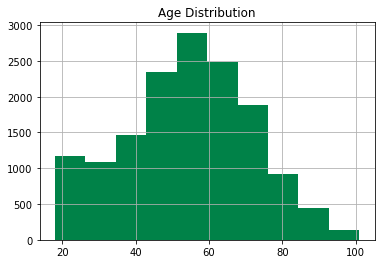

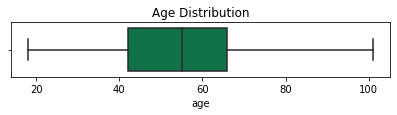

In [127]:
# Age Distributiobn:Histogram
sns.set_palette(sns.color_palette(starbucks,1))
profile_df['age'].hist(bins=10)

plt.title('Age Distribution')

#Age distribution: Box Plot

print("Median Age  : $",profile_df['age'].median())


plt.figure(figsize=[6.8,1])
sns.boxplot(data=profile_df, x='age')
plt.title('Age Distribution')

Code Age in terms of Generation criteria:
- Gen Z: 18 – 25
- Millennials: 26 – 43
- Gen Xers: 44 – 56
- Boomers: 57 – 75
- Matures: 76+ ]


In [128]:
profile_df['age_group'].value_counts()

Boomers(57-75)       5147
GenXers(44-56)       4058
Millennias(26-43)    2956
Matures(76+)         1495
GenZ(18–25)          1169
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Customer Age group')

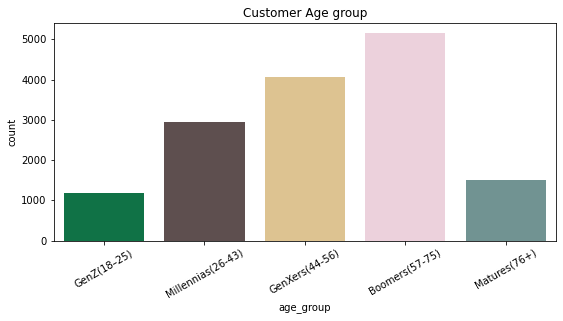

In [129]:
#Group the age ranges
sns.set_palette(sns.color_palette(starbucks,5))
fig = plt.figure(figsize = (9,4))
sns.countplot(x='age_group',data=profile_df)
plt.xticks(rotation=30)
plt.title('Customer Age group')


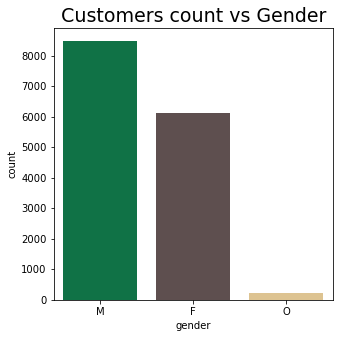

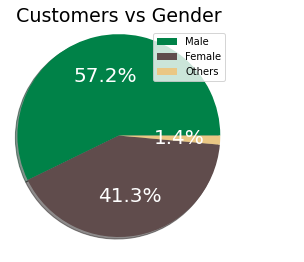

In [130]:

#Gender distribution
sns.set_palette(sns.color_palette(starbucks,3))
plt.figure(figsize=[5,5])
sns.countplot(x= profile_df['gender'], order = profile_df['gender'].value_counts().index)

plt.title('Customers count vs Gender', fontsize=19)



#Gender Distribution in Percentage

gender = profile_df['gender'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(gender, labels=['Male', 'Female' , 'Others'], shadow=True, autopct='%1.1f%%', 
            textprops={'color': "w", 'fontsize': 20})

plt.axis('equal')
plt.title('Customers vs Gender', fontsize=19)
plt.legend(loc='best')

In [131]:
gender

M    8484
F    6129
O     212
Name: gender, dtype: int64

In [132]:
#Analyze income:

profile_df['customer_income'].describe()


count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: customer_income, dtype: float64

Text(0.5, 0, 'Salary(USD)')

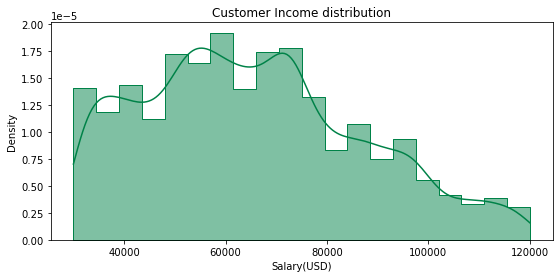

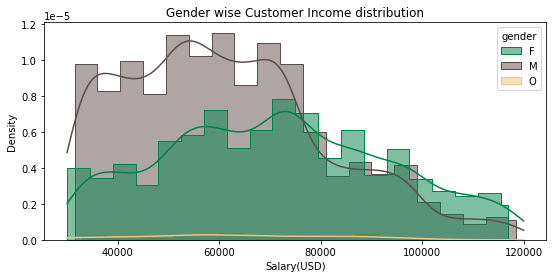

In [133]:
#Income distribution
sns.set_palette(sns.color_palette(starbucks,3))
plt.figure(figsize=[9,4])
sal_hist1 = sns.histplot(data = profile_df, x = 'customer_income',  multiple = "dodge",element = 'step', 
                        bins = 20, kde = True ,stat = 'density' ).set_title("Customer Income distribution")
plt.xlabel("Salary(USD)")

#Income distribution by gender

plt.figure(figsize=[9,4])
sal_hist = sns.histplot(data = profile_df, x = 'customer_income', hue = 'gender', 
                        multiple = "dodge",element = 'step', bins = 20, kde = True ,stat = 'density' ).set_title("Gender wise Customer Income distribution")
plt.xlabel("Salary(USD)")

Text(0.5, 1.0, 'Customers count per Salary Range')

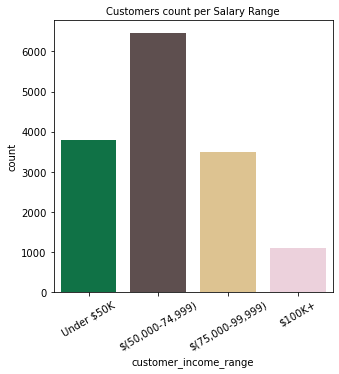

In [142]:

#Gender distribution
sns.set_palette(sns.color_palette(starbucks,6))
plt.figure(figsize=[5,5])
g = sns.countplot(x= profile_df['customer_income_range'], order = ['Under $50K','$(50,000-74,999)','$(75,000-99,999)','$100K+'])
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title('Customers count per Salary Range', fontsize=10)


In [143]:
profile_df['customer_income_range'].value_counts()

$(50,000-74,999)    6446
Under $50K          3781
$(75,000-99,999)    3505
$100K+              1093
Name: customer_income_range, dtype: int64

In [38]:
print(pd.DataFrame(profile_df['customer_income'].describe()))

       customer_income
count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000


In [150]:
#Median Income

print("Median Income  : $",profile_df['customer_income'].median())
print("Maximum Income : $",profile_df['customer_income'].max())
print("Maximum Income : $",profile_df['customer_income'].min())

print(" ")

print("Median Income - Males  : $",round(profile_df[profile_df['gender']=='M']['customer_income'].mean()))
print("Median Income - Males  : $",profile_df[profile_df['gender']=='M']['customer_income'].median())
print("Median Income - Female : $",round(profile_df[profile_df['gender']=='F']['customer_income'].mean()))
print("Median Income - Female : $",profile_df[profile_df['gender']=='F']['customer_income'].median())



Median Income  : $ 64000.0
Maximum Income : $ 120000.0
Maximum Income : $ 30000.0
 
Median Income - Males  : $ 61195
Median Income - Males  : $ 59000.0
Median Income - Female : $ 71306
Median Income - Female : $ 71000.0


Text(0, 0.5, 'Number of Customers or Test Subjects')

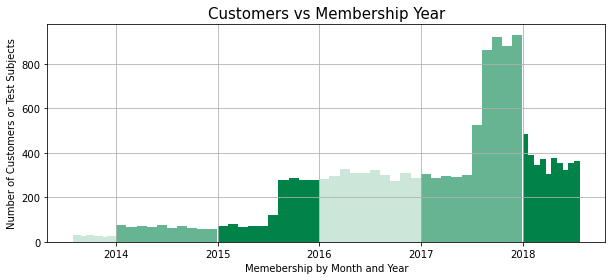

In [94]:
# membership by year of joining
sns.set_palette(sns.color_palette(starbucks_d,6))
plt.figure(figsize=(10, 4))
profile_df['became_member_on'].groupby(profile_df['became_member_on'].dt.year).hist(bins=10)
plt.title('Customers vs Membership Year', fontsize=15)
plt.xlabel('Memebership by Month and Year')
plt.ylabel('Number of Customers or Test Subjects')

In [154]:
#Eariest and Most recent customer join date

profile_df['became_member_on'].groupby(profile_df['became_member_on'].dt.year)
print("Eariest customer join date :", profile_df['became_member_on'].min())
print("Most recent customer join date :", profile_df['became_member_on'].max())

Eariest customer join date : 2013-07-29 00:00:00
Most recent customer join date : 2018-07-26 00:00:00


### 3. Transcript Data:

In [97]:
#Seperatng transaction and offer data from transcript dataframe

offers_df, transactions_df = clean_transcript(transcript)

In [98]:
#Offer Data
offers_df.sample(10)

,customer_id,event,time_in_days,offer_id,completed,received,viewed
190773,0809ff2ff8fe461ea8996377a7abd46d,offer completed,19,ae264e3637204a6fb9bb56bc8210ddfd,1,0,0
151581,5b795cd47abb4c11b16d9a63100eecb3,offer received,17,2298d6c36e964ae4a3e7e9706d1fb8c2,0,1,0
189240,4c0b938c4e994b168f0062d7dbb79796,offer completed,19,2298d6c36e964ae4a3e7e9706d1fb8c2,1,0,0
230116,75b137f86e5c480e95aa83c097eb1d5a,offer viewed,22,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,1
61615,d08bb3a6b09c4059970788a1edbc0312,offer received,7,fafdcd668e3743c1bb461111dcafc2a4,0,1,0
272797,99991bf10a0f4523b5facba836769ae9,offer completed,25,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0
13170,6f72b97a722449dba554f7c78a9112ca,offer viewed,0,2298d6c36e964ae4a3e7e9706d1fb8c2,0,0,1
129260,b551e33de83147b694ff2ebf4d52d226,offer viewed,14,2298d6c36e964ae4a3e7e9706d1fb8c2,0,0,1
204327,3a4d1e41dbc143119460fd35f25cec31,offer received,21,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0
166278,14379f3522ed480098b880f2ed071058,offer viewed,17,5a8bc65990b245e5a138643cd4eb9837,0,0,1


In [99]:
#Transactions Data
transactions_df.sample(10)

,customer_id,event,time_in_days,amount
36409,6cb064f1f93c47bd9e1b92c8256ca5f3,transaction,3,2.41
188626,70be3c98f6f0499ab6fd1c1e487094b5,transaction,19,18.23
195704,b144cbb863a7459e9ac7cd15d9ea058a,transaction,20,9.29
36414,11edb6a7da284f19a8a1da5e7c0c9652,transaction,3,19.58
109086,c1dc09fa7f5940a38c2f393f89cb4a50,transaction,13,5.09
79004,25af91e1d87248c387b17bcba16372b8,transaction,8,4.91
294475,c0e549a3709e4c34bf744a36143c2e9f,transaction,27,3.78
149100,393041633e9e4d1c834537ae4ecf063d,transaction,16,2.23
14532,da47c4418d464beb8fcd91c25d143d5b,transaction,0,1.29
178506,b8b1f116c8db44e0a742490fa7e09db9,transaction,18,21.65


In [100]:

offers_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 167581 entries, 0 to 306527
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   167581 non-null  object
 1   event         167581 non-null  object
 2   time_in_days  167581 non-null  int64 
 3   offer_id      167581 non-null  object
 4   completed     167581 non-null  uint8 
 5   received      167581 non-null  uint8 
 6   viewed        167581 non-null  uint8 
dtypes: int64(1), object(3), uint8(3)
memory usage: 6.9+ MB


In [101]:

transactions_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 138953 entries, 12654 to 306533
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   138953 non-null  object
 1   event         138953 non-null  object
 2   time_in_days  138953 non-null  int64 
 3   amount        138953 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.3+ MB


In [102]:
offers_type = pd.merge(offers_df, portfolio_df, left_on='offer_id', right_on='offer_id', how='inner')
offers_type.head(2)

,customer_id,event,time_in_days,offer_id,completed,received,viewed,offer_name,offer_type,offer_difficulty,offer_duration,offer_reward,email,mobile,social,web
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,offer_4,bogo,5,7,5,1,1,0,1
1,ebe7ef46ea6f4963a7dd49f501b26779,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,offer_4,bogo,5,7,5,1,1,0,1


In [103]:
data_all = pd.merge(offers_type, profile_df, left_on='customer_id', right_on='customer_id', how='inner')
data_all.head(2)

,customer_id,event,time_in_days,offer_id,completed,received,viewed,offer_name,offer_type,offer_difficulty,...,mobile,social,web,gender,age,age_group,customer_income,customer_income_range,became_member_on,membership_year
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,offer_4,bogo,5,...,1,0,1,F,75,Boomers(57-75),100000.0,$100K+,2017-05-09,2017
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,1,offer_4,bogo,5,...,1,0,1,F,75,Boomers(57-75),100000.0,$100K+,2017-05-09,2017


## B. Offer Analysis

In this section we are going to deep dive into each of the offers and determine how the users have responded to the offers.

The aim is to develop visualization and present a detailes report on th eoffer performance and provide recomendations based on the findings. 

[Text(0.5, 0, ''), Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Informational')]

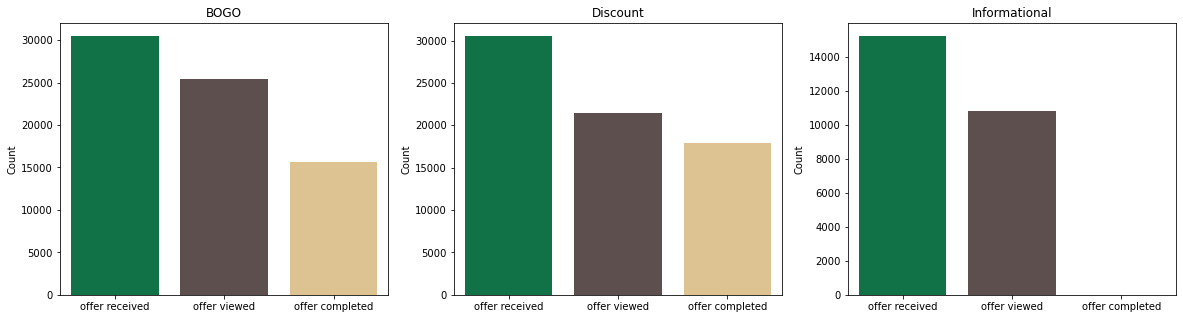

In [36]:
#Comparing offer recieved, viewed, completed by offer type

offers_type = pd.merge(offers_df, portfolio_df, left_on='offer_id', right_on='offer_id', how='inner')

df_graph = offers_type.groupby(['event', 'offer_type'])['customer_id'].count().reset_index()
df_graph['event'] = pd.Categorical(df_graph['event'], ["offer received", "offer viewed", "offer completed"])

df_graph.sort_values('event', inplace = True)
df_graph = df_graph.rename(columns = {'customer_id':'customer_count'})

df_graph.sort_values('event', inplace=True)

fig, axs = plt.subplots(ncols=3, figsize=(20, 5))

sns.set_palette(sns.color_palette(starbucks,3))

ax = sns.barplot(x = 'event', y='customer_count', data=df_graph.query('offer_type == "bogo"'),ax=axs[0])
ax.set(xlabel='', ylabel='Count', title='BOGO')

ax = sns.barplot(x = 'event', y='customer_count', data=df_graph.query('offer_type == "discount"'),ax=axs[1])
ax.set(xlabel='', ylabel='Count', title='Discount')

ax = sns.barplot(x = 'event', y='customer_count', data=df_graph.query('offer_type == "informational"'), ax=axs[2])
ax.set(xlabel='', ylabel='Count', title='Informational')
    

In [39]:
offer_overall = profile_offer[['customer_id',
 'viewed_rate',
 'completed_rate', 'bogo_viewed_rate',
 'bogo_completed_rate', 'discount_viewed_rate','informational_viewed_rate',
 'discount_completed_rate']]

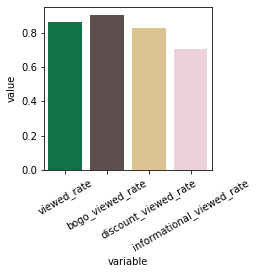

In [41]:
#Analyze Viewed rate

df = plot_data_overall(offer_overall,4, 30,['viewed_rate','bogo_viewed_rate',
                                            'discount_viewed_rate','informational_viewed_rate'])

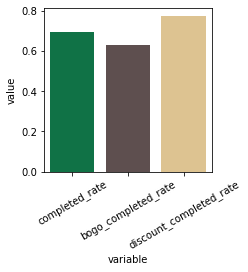

In [42]:
#Analyze Completed rate

df = plot_data_overall(offer_overall,4, 30, ['completed_rate','bogo_completed_rate','discount_completed_rate'])

###### Insights:

**Overall** 86% of the offer recieved are Viewed, and 69% of those viewed are completed. 

**BOGO** with 90% has the **highest View rate**, also **least completeion rate** of 62%

**Disconunt** with 77% has the **highest completion rate**


### Offer Analysis: Overall response to the offer

In [44]:
offer_overall = profile_offer[['customer_id','viewed_count','completed_count','viewed_rate','completed_rate']]

offer_bogo = profile_offer[['customer_id','bogo_viewed_count','bogo_completed_count','bogo_viewed_rate','bogo_completed_rate']]

offer_discount = profile_offer[['customer_id','discount_viewed_count','discount_completed_count','discount_viewed_rate','discount_completed_rate']]

offer_informational = profile_offer[['customer_id','informational_received_count','informational_viewed_count','informational_viewed_rate']]

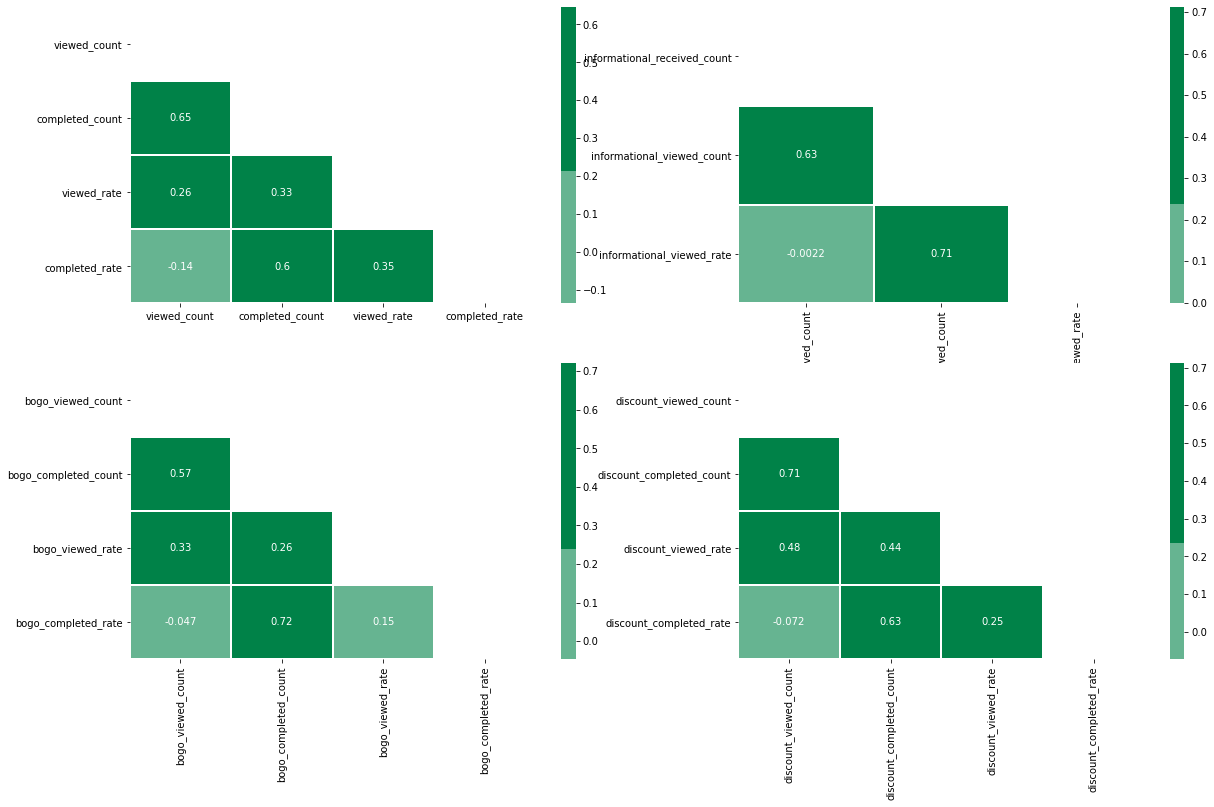

In [45]:
#Correlation plot to analyze how View count, View rate, Completed cont and completed rates are correlated. 

fig, axs = plt.subplots(ncols=2, nrows = 2, figsize=(20, 12))


ax = sns.heatmap(offer_overall.corr(), annot=True, mask = np.triu(offer_overall.corr()), linewidths=1, 
                 center=0, cmap = starbucks_d, ax= axs[0,0])


ax = sns.heatmap(offer_informational.corr(), annot=True,  mask = np.triu(offer_informational.corr()),linewidths=1, 
                 center=0, cmap = starbucks_d, ax= axs[0,1])

ax = sns.heatmap(offer_bogo.corr(), annot=True, linewidths=1, mask = np.triu(offer_bogo.corr()), 
                 center=0, cmap = starbucks_d, ax= axs[1,0])


ax = sns.heatmap(offer_discount.corr(), annot=True, linewidths=1, mask = np.triu(offer_discount.corr()), 
                 center=0, cmap = starbucks_d, ax= axs[1,1])

**Analysis**:

Moderate correlation between 
* completed counts and completed rate
* completed count and viewed count

The above correlation are as expected acrss all offer types. No significant pattern here. 

## (a).   Overall Offer performance

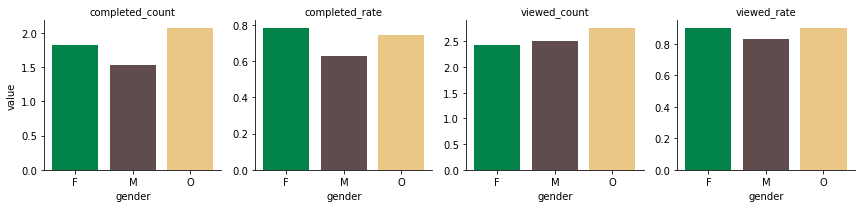

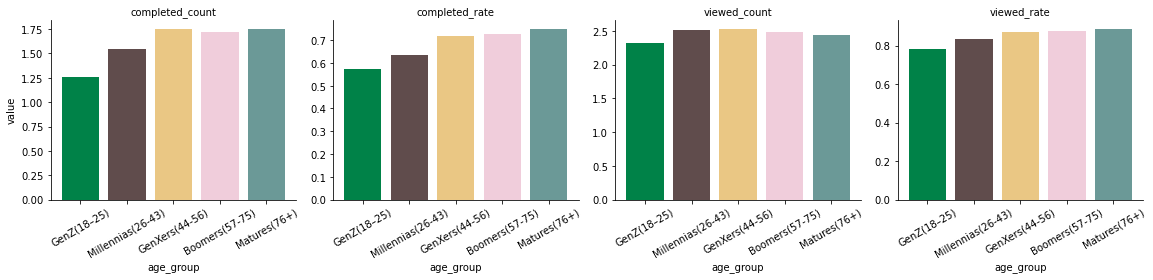

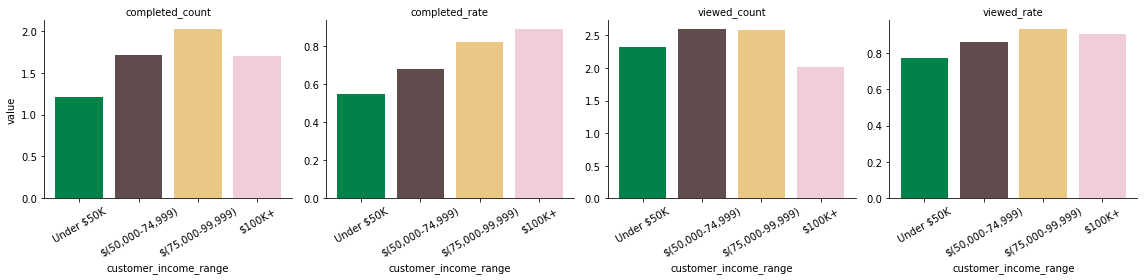

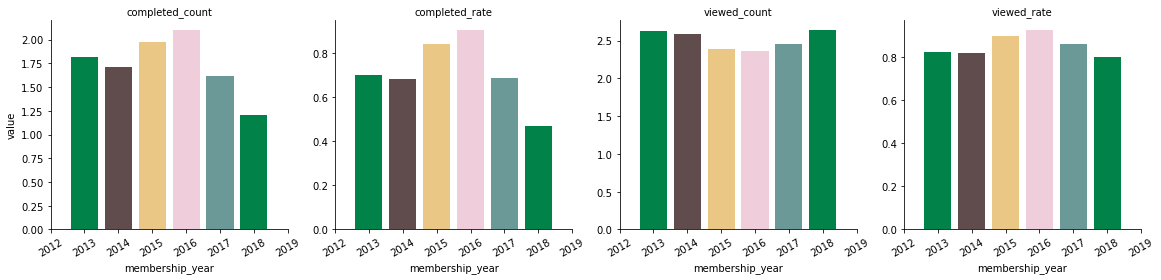

In [46]:
#Plot to visualize average Offers completed, Offers viewed , offer completion rate, offer view rate

df = plot_data(offer_overall,profile_offer,  groupby = 'gender',palette =3,col_wrap=5,height=3,label_rotation =0)

df = plot_data(offer_overall,profile_offer,  groupby = 'age_group',palette =6,col_wrap=5,height=4,label_rotation =30)

df = plot_data(offer_overall,profile_offer,  groupby = 'customer_income_range',palette =5,col_wrap=5,height=4,label_rotation =30)

df = plot_data(offer_overall,profile_offer,  groupby = 'membership_year',palette =6,col_wrap=5,height=4,label_rotation =30)


### 1. Offer type: BOGO

###### BOGO offers

In [47]:
portfolio_df[portfolio_df['offer_type']=='bogo']

,offer_id,offer_name,offer_type,offer_difficulty,offer_duration,offer_reward,email,mobile,social,web
0,ae264e3637204a6fb9bb56bc8210ddfd,offer_1,bogo,10,7,10,1,1,1,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,offer_2,bogo,10,5,10,1,1,1,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_4,bogo,5,7,5,1,1,0,1
8,f19421c1d4aa40978ebb69ca19b0e20d,offer_9,bogo,5,5,5,1,1,1,1


In [48]:
offer_bogo_data_viewed = profile_offer[['customer_id','offer_1_viewed_rate',
 'offer_2_viewed_rate','offer_4_viewed_rate','offer_9_viewed_rate']]

offer_bogo_data_comp = profile_offer[['customer_id','completed_rate','offer_1_completed_rate',
 'offer_2_completed_rate','offer_4_completed_rate','offer_9_completed_rate']]

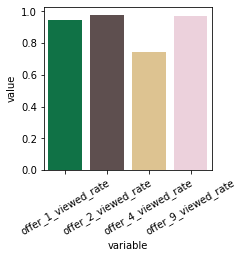

In [49]:
#Analyze Offer Viewed Rate

df = plot_data_overall(offer_bogo_data_viewed , 4, 30, ['offer_1_viewed_rate',
 'offer_2_viewed_rate','offer_4_viewed_rate','offer_9_viewed_rate'])

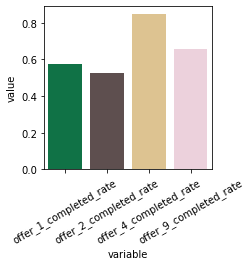

In [50]:
#Analyze Offer Completed rate

df = plot_data_overall(offer_bogo_data_comp, 4, 30, ['offer_1_completed_rate',
 'offer_2_completed_rate','offer_4_completed_rate','offer_9_completed_rate'])

**Insights**:

Offer 4 with Difficulty 5, duration 7 and reward 5 has the least Viewed rate, also has the highest completion rate.


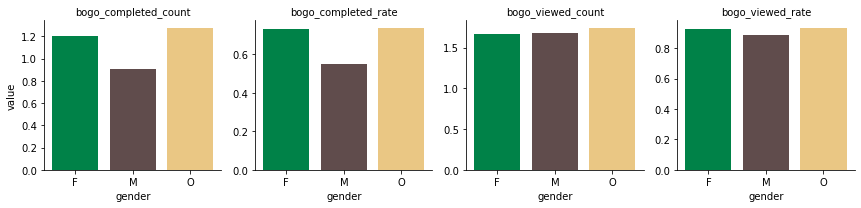

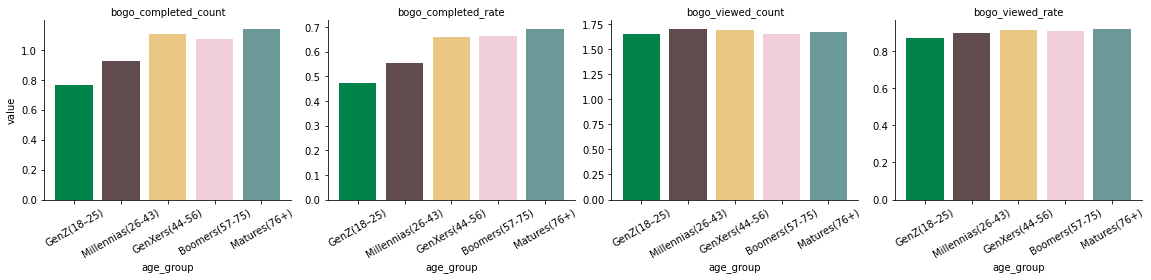

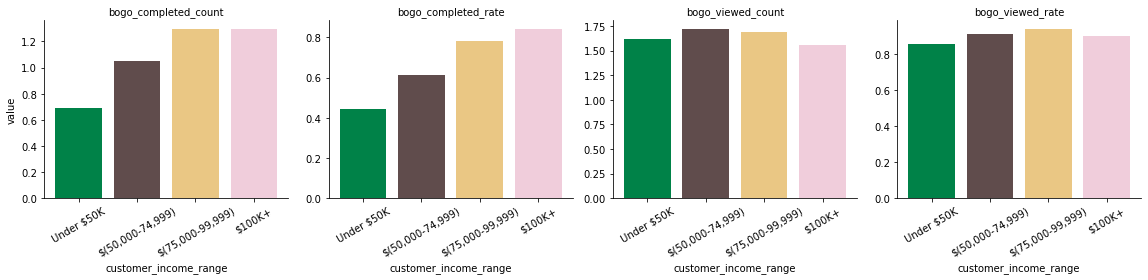

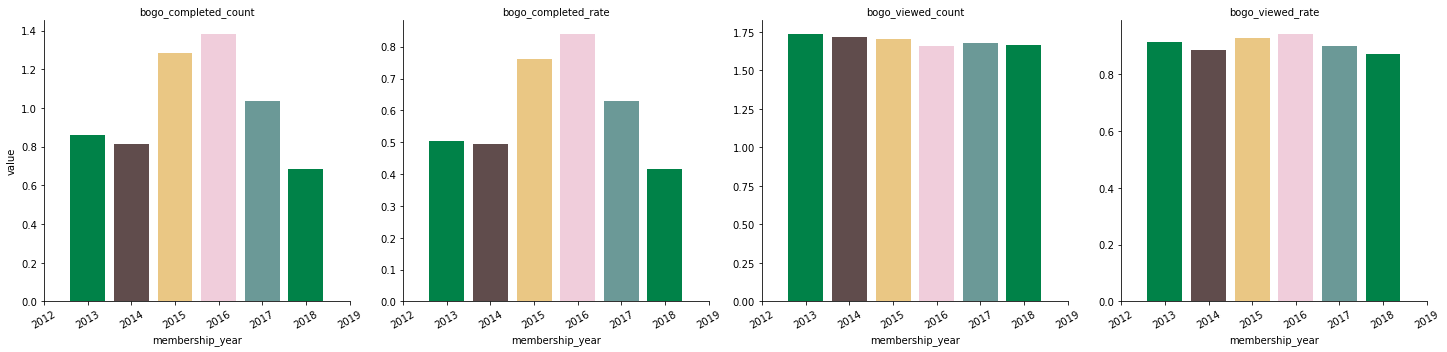

In [51]:
#BOGO: Plot to visualize average Offers completed, Offers viewed , offer completion rate, offer view rate

df = plot_data(offer_bogo,profile_offer,  groupby = 'gender',palette =3,col_wrap=5,height=3,label_rotation =0)

df = plot_data(offer_bogo,profile_offer,  groupby = 'age_group',palette =7,col_wrap=5,height=4,label_rotation =30)

df = plot_data(offer_bogo,profile_offer,  groupby = 'customer_income_range',palette =6,col_wrap=5,height=4,label_rotation =30)

df = plot_data(offer_bogo,profile_offer,  groupby = 'membership_year', palette =6,col_wrap=5,height=5,label_rotation =30)

### 2. Offer type: Discount

In [52]:
offer_discount = profile_offer[['customer_id','discount_received_count','discount_viewed_count',
 'discount_completed_count','discount_viewed_rate','discount_completed_rate']]

In [53]:

offer_discount_data_completed = profile_offer[['customer_id','offer_5_completed_rate',
 'offer_6_completed_rate','offer_7_completed_rate','offer_10_completed_rate']]

offer_discount_data_viewed = profile_offer[['customer_id','offer_5_viewed_rate',
 'offer_6_viewed_rate','offer_7_viewed_rate','offer_10_viewed_rate']]

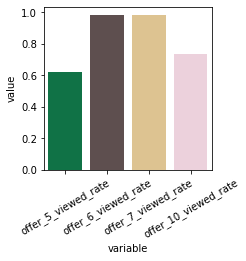

In [54]:
#Analyze Offer viewed rate
df = plot_data_overall(offer_discount_data_viewed , 4, 30, ['offer_5_viewed_rate',
 'offer_6_viewed_rate','offer_7_viewed_rate','offer_10_viewed_rate'])

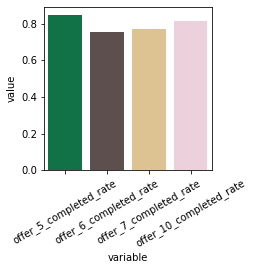

In [55]:
#Analyze Offer completed rate
df = plot_data_overall(offer_discount_data_completed , 4, 30, ['offer_5_completed_rate',
 'offer_6_completed_rate','offer_7_completed_rate','offer_10_completed_rate'])

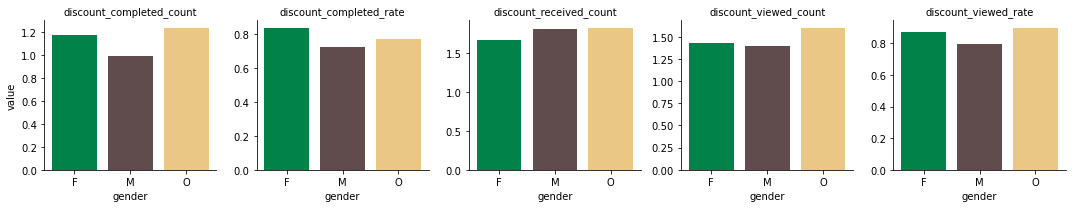

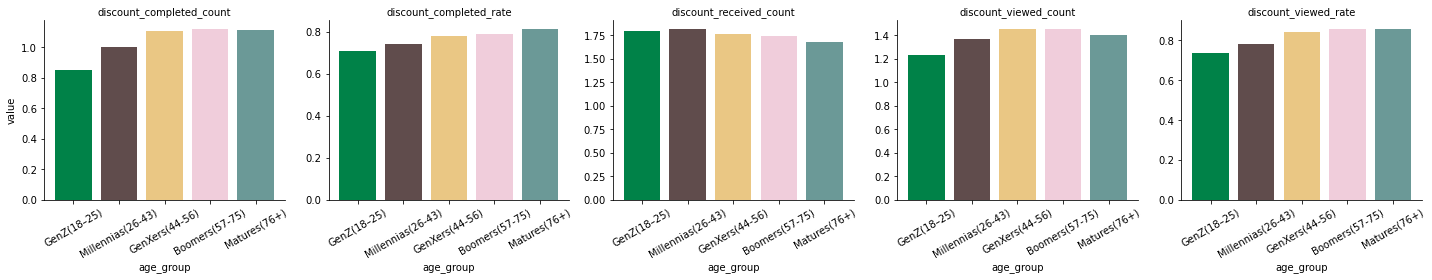

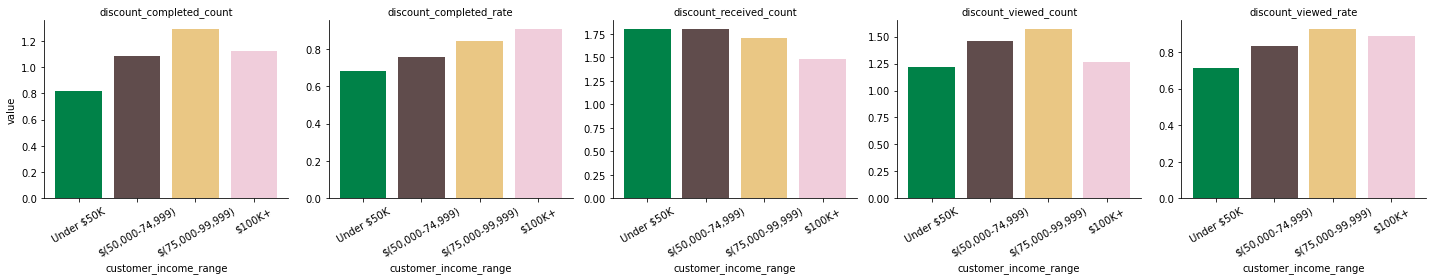

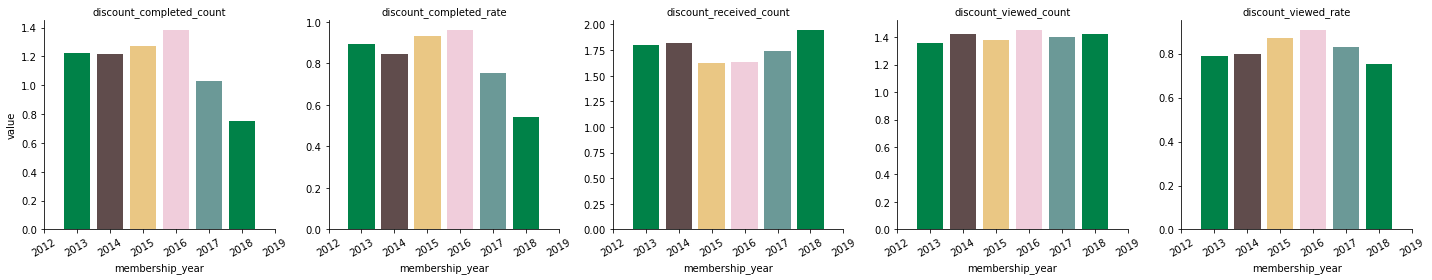

In [56]:
#Discount: Plot to visualize average Offers completed, Offers viewed , offer completion rate, offer view rate

df = plot_data(offer_discount,profile_offer,  groupby = 'gender',palette =3,col_wrap=5,height=3,label_rotation =0)

df = plot_data(offer_discount,profile_offer,  groupby = 'age_group',palette =6,col_wrap=5,height=4,label_rotation =30)

df = plot_data(offer_discount,profile_offer,  groupby = 'customer_income_range',palette =5,col_wrap=5,height=4,label_rotation =30)

df = plot_data(offer_discount,profile_offer,  groupby = 'membership_year',palette =6,col_wrap=5,height=4,label_rotation =30)


### 3. Offer type: Informational

In [57]:
offer_informational = profile_offer[['customer_id', 'informational_viewed_count','informational_viewed_rate']]

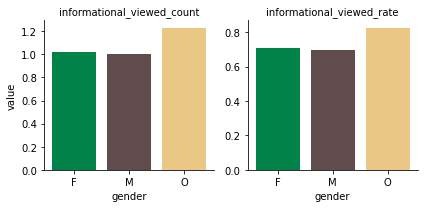

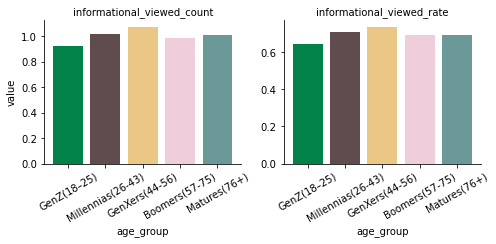

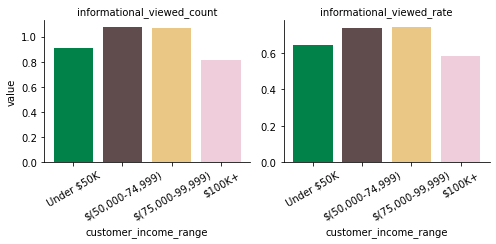

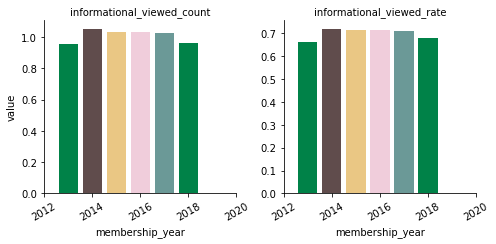

In [58]:
#Informational: Plot to visualize average Offers viewed , offer view rate

df = plot_data(offer_informational ,profile_offer,  groupby = 'gender',palette =3,col_wrap=2,height=3,label_rotation =0)

df = plot_data(offer_informational,profile_offer,  groupby = 'age_group',palette =6,col_wrap=2,height=3.5,label_rotation =30)

df = plot_data(offer_informational,profile_offer,  groupby = 'customer_income_range',palette =5,col_wrap=2,height=3.5,label_rotation =30)

df = plot_data(offer_informational,profile_offer,  groupby = 'membership_year',palette =6,col_wrap=2,height=3.5,label_rotation =30)


## (b). Offer Difficulty

In [59]:
offer_difficulty =  profile_offer[['customer_id','offer_difficulty_5_completed_rate',
 'offer_difficulty_20_completed_rate','offer_difficulty_10_completed_rate', 'offer_difficulty_7_completed_rate']]

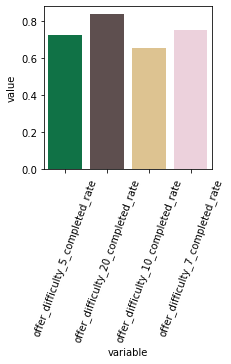

In [60]:
df = plot_data_overall(offer_difficulty, 4, 70, ['offer_difficulty_5_completed_rate','offer_difficulty_20_completed_rate',
 'offer_difficulty_10_completed_rate','offer_difficulty_7_completed_rate'])

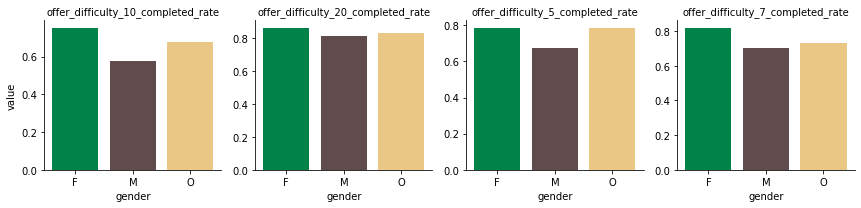

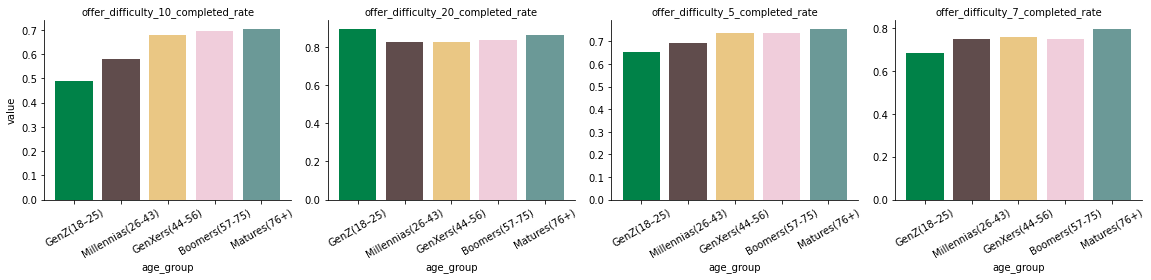

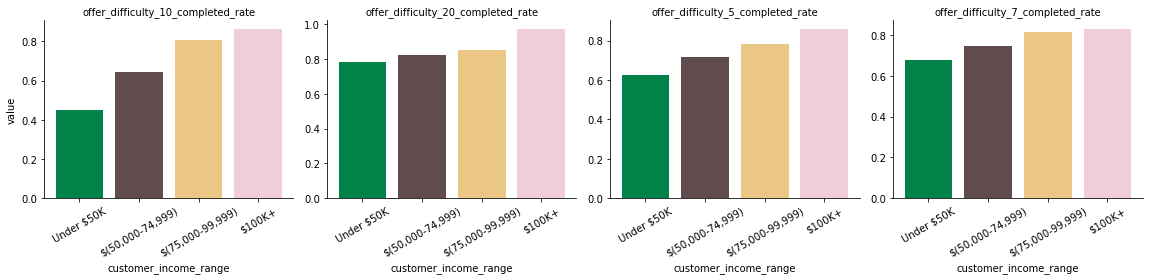

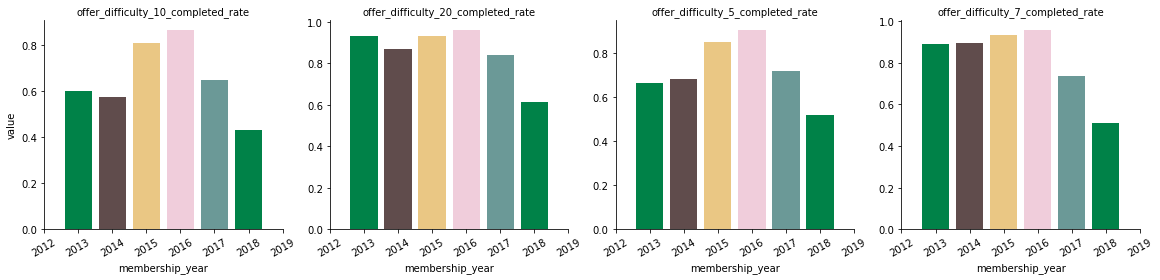

In [61]:
df = plot_data(offer_difficulty  ,profile_offer,  groupby = 'gender',palette =3,col_wrap=5,height=3,label_rotation =0)

df = plot_data(offer_difficulty ,profile_offer,  groupby = 'age_group',palette =6,col_wrap=5,height=4,label_rotation =30)

df = plot_data(offer_difficulty ,profile_offer,  groupby = 'customer_income_range',palette =6,col_wrap=5,height=4,label_rotation =30)

df = plot_data(offer_difficulty ,profile_offer,  groupby = 'membership_year',palette =6,col_wrap=5,height=4,label_rotation =30)

## (c). Offer Duration

In [62]:
#Analyze Offer based on offer Duration:

    
offer_duration =  profile_offer[['customer_id', 'offer_duration_7_viewed_rate', 'offer_duration_7_completed_rate',
 'offer_duration_10_viewed_rate', 'offer_duration_10_completed_rate','offer_duration_5_viewed_rate',
 'offer_duration_5_completed_rate']]
    

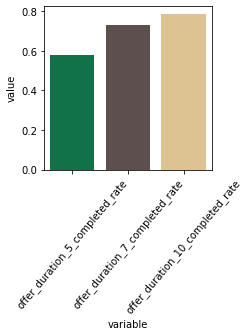

In [63]:
df = plot_data_overall(offer_duration, 4, 50, ['offer_duration_5_completed_rate',
                                               'offer_duration_7_completed_rate',
                                               'offer_duration_10_completed_rate'])

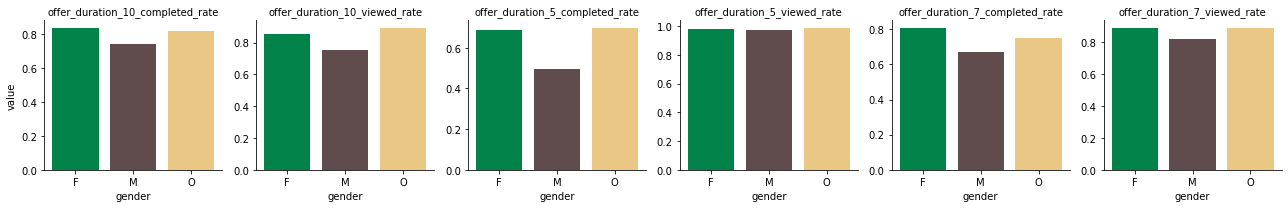

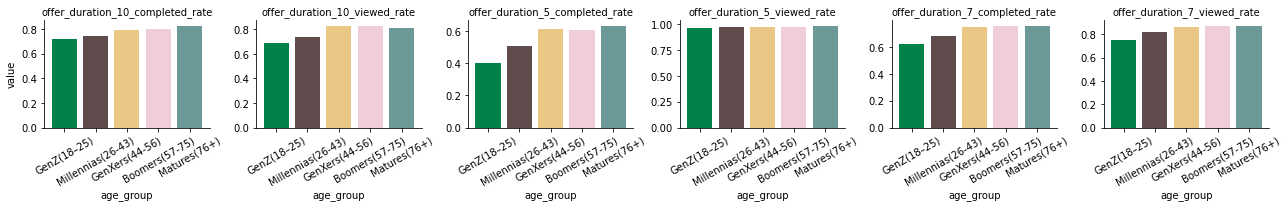

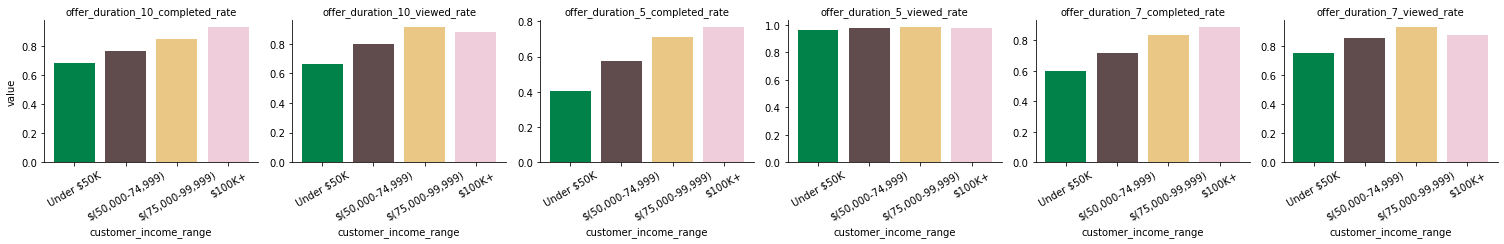

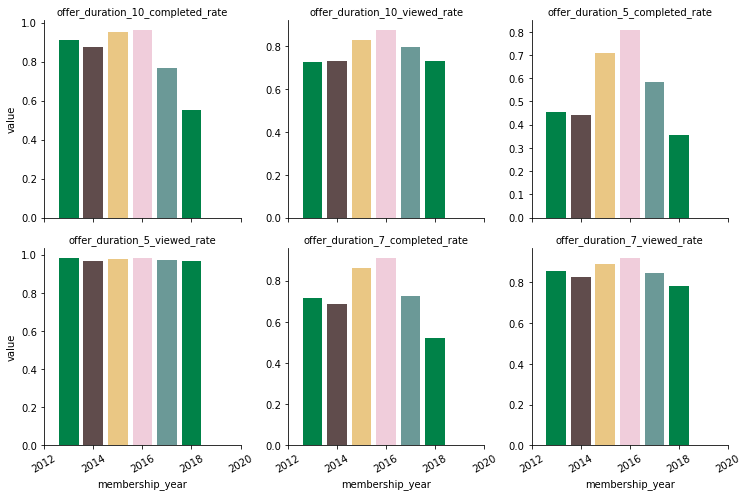

In [64]:
df = plot_data( offer_duration ,profile_offer,  groupby = 'gender',palette =3,col_wrap=6,height=3,label_rotation =0)

df = plot_data( offer_duration,profile_offer,  groupby = 'age_group',palette =6,col_wrap=6,height=3,label_rotation =30)

df = plot_data( offer_duration,profile_offer,  groupby = 'customer_income_range',palette =5,col_wrap=6,height=3.5,label_rotation =30)

df = plot_data( offer_duration,profile_offer,  groupby = 'membership_year',palette =6,col_wrap=3,height=3.5,label_rotation =30)


## (d). Offer Reward

In [65]:
offer_reward =  profile_offer[['customer_id','offer_reward_2_viewed_rate','offer_reward_2_completed_rate',
 'offer_reward_3_viewed_rate','offer_reward_3_completed_rate','offer_reward_5_viewed_rate',
 'offer_reward_5_completed_rate','offer_reward_10_viewed_rate','offer_reward_10_completed_rate', 'offer_reward_sum']]

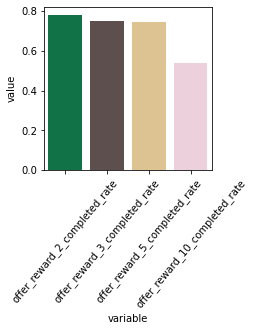

In [66]:
df = plot_data_overall(offer_reward, 5, 50, ['offer_reward_2_completed_rate','offer_reward_3_completed_rate',
                                               'offer_reward_5_completed_rate','offer_reward_10_completed_rate'])

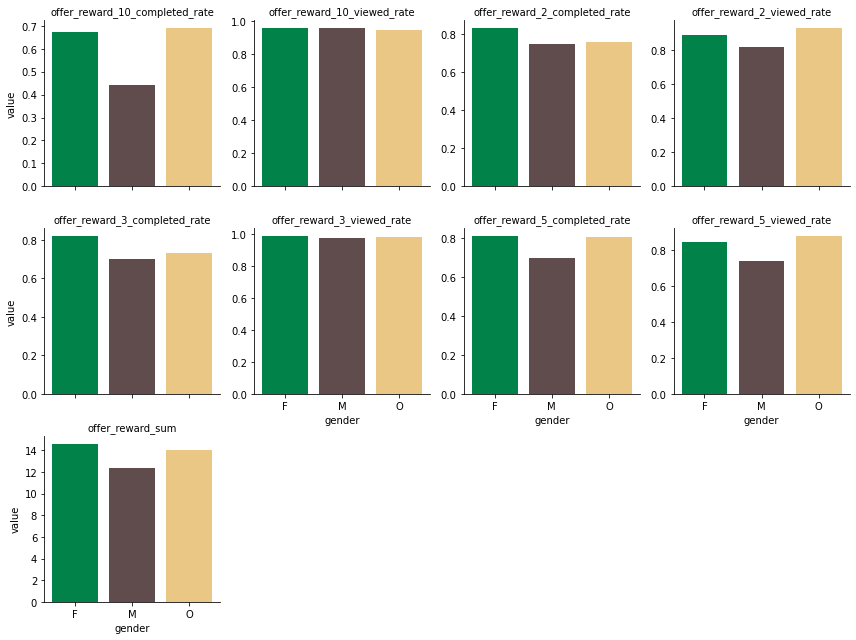

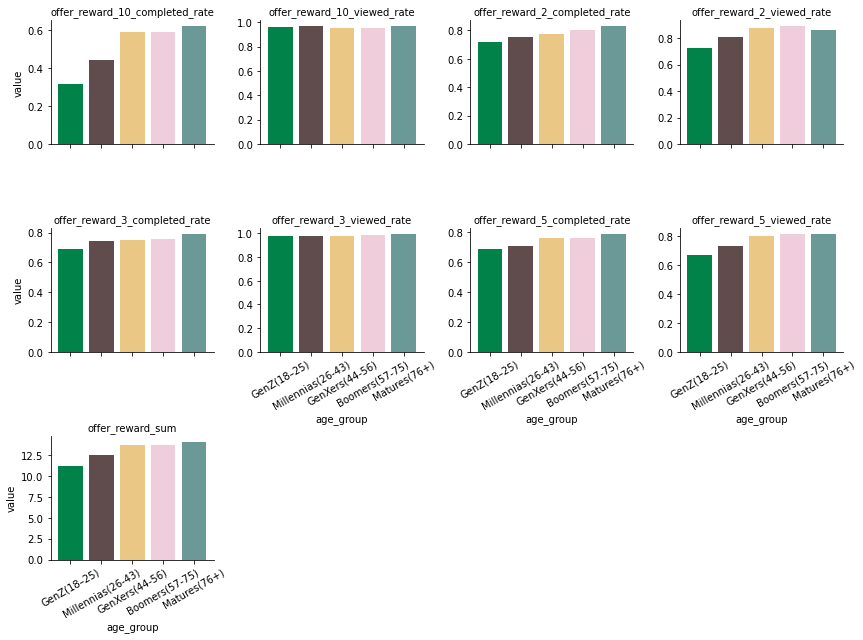

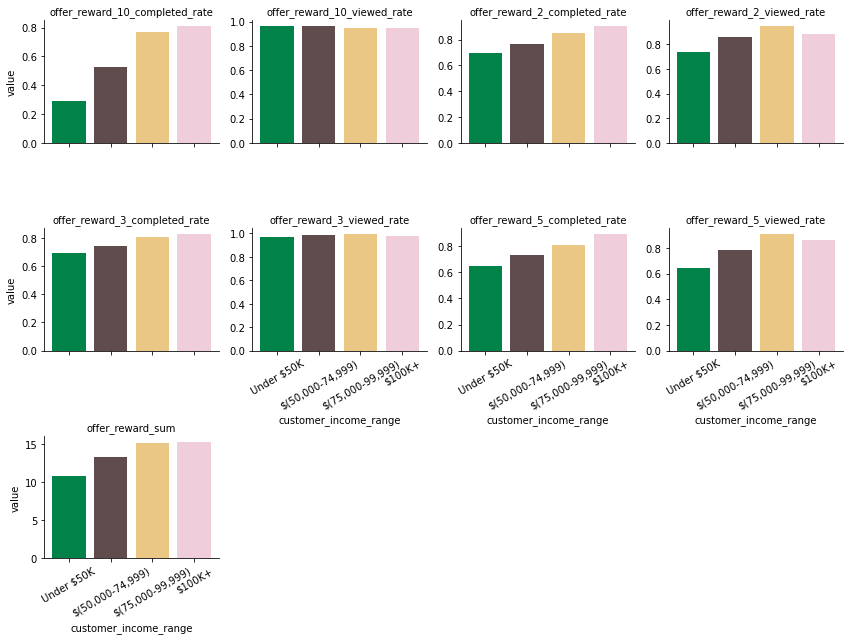

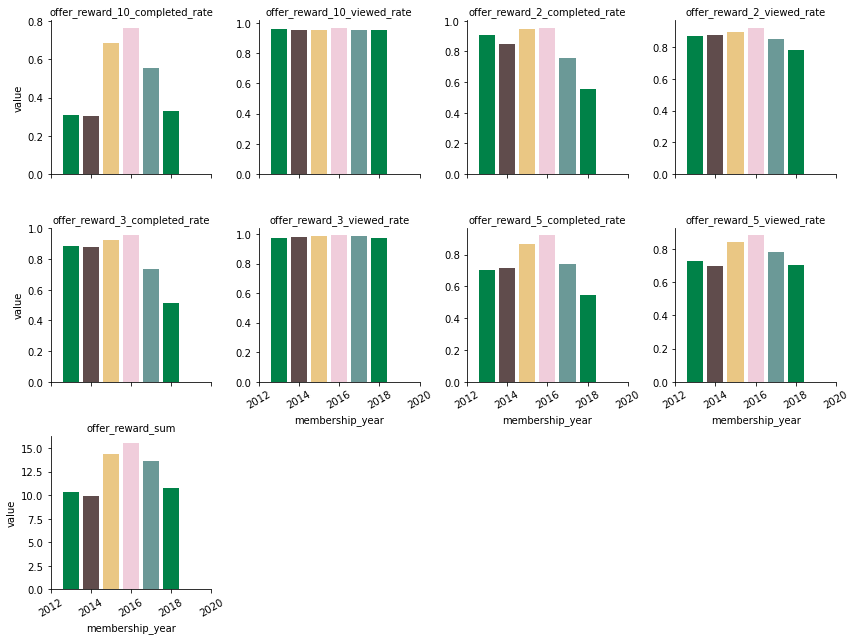

In [67]:
df = plot_data(offer_reward ,profile_offer,  groupby = 'gender',palette =4,col_wrap=4,height=3,label_rotation =0)
df = plot_data( offer_reward,profile_offer,  groupby = 'age_group',palette =6,col_wrap=4,height=3,label_rotation =30)
df = plot_data( offer_reward,profile_offer,  groupby = 'customer_income_range',palette =6,col_wrap=4,height=3,label_rotation =30)
df = plot_data( offer_reward,profile_offer,  groupby = 'membership_year',palette =6,col_wrap=4,height=3,label_rotation =30)

## (d). Channel Analysis

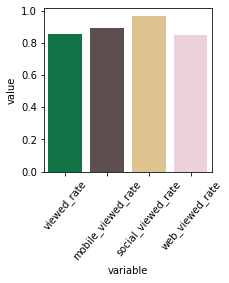

In [68]:
channel_viewed =  profile_offer[['customer_id', 'viewed_rate' ,'mobile_viewed_rate',
 'social_viewed_rate','web_viewed_rate']]

df = plot_data_overall( channel_viewed , 4, 50, ['viewed_rate'  ,'mobile_viewed_rate','social_viewed_rate','web_viewed_rate'])

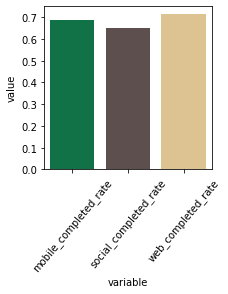

In [69]:
channel_completed =  profile_offer[['customer_id', 'mobile_completed_rate', 'social_completed_rate',
 'web_completed_rate','completed_rate' ,'mobile_viewed_rate','social_viewed_rate', 'web_viewed_rate']]

df = plot_data_overall( channel_completed , 4, 50, [ 'mobile_completed_rate','social_completed_rate','web_completed_rate'])

### 1. Mobile

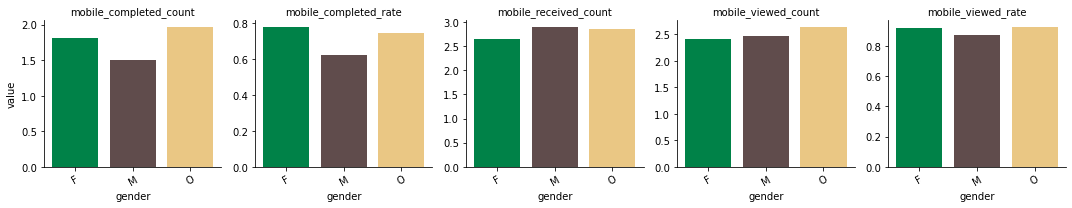

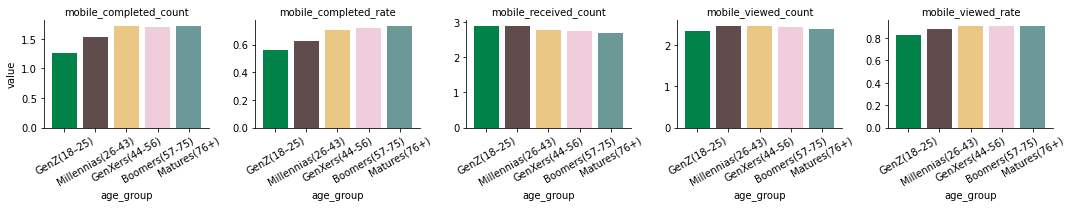

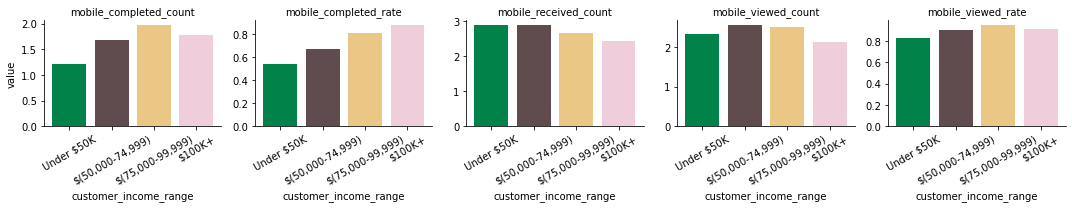

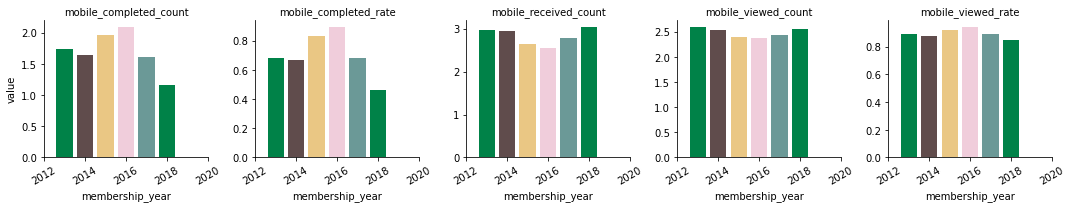

In [70]:
#Analyze offers recieved through Channel - Mobile

offer_mobile =  profile_offer[['customer_id',  
 'mobile_received_count',
 'mobile_viewed_count',
 'mobile_completed_count',
 'mobile_viewed_rate',
 'mobile_completed_rate',
]]
    
    
df = plot_data(offer_mobile ,profile_offer,  groupby = 'gender',palette =4,col_wrap=5,height=3,label_rotation =30)
df = plot_data( offer_mobile,profile_offer,  groupby = 'age_group',palette =6,col_wrap=5,height=3,label_rotation =30)
df = plot_data( offer_mobile,profile_offer,  groupby = 'customer_income_range',palette =6,col_wrap=5,height=3,label_rotation =30)
df = plot_data( offer_mobile,profile_offer,  groupby = 'membership_year',palette =6,col_wrap=5,height=3,label_rotation =30)


### 2. Social

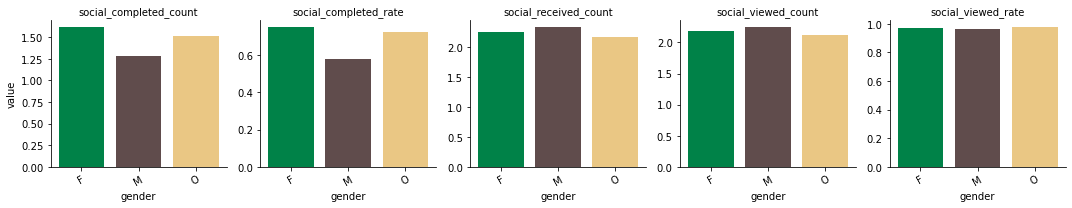

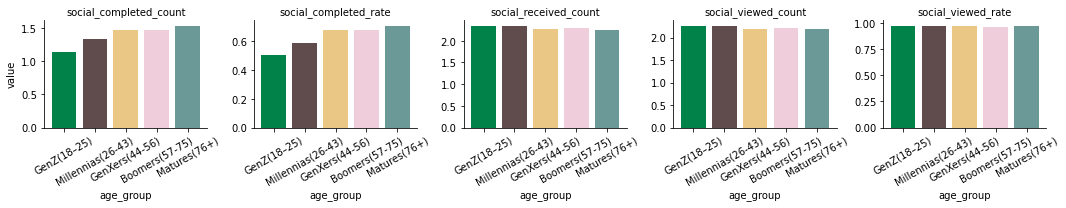

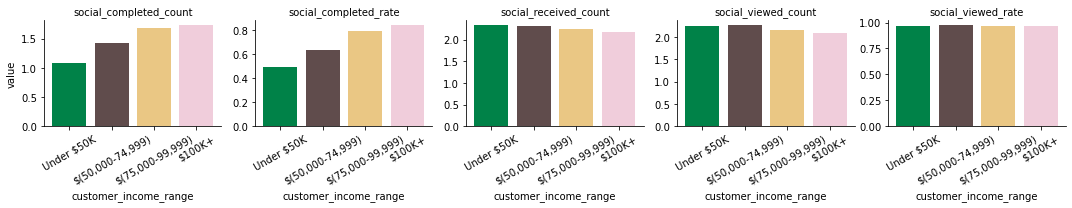

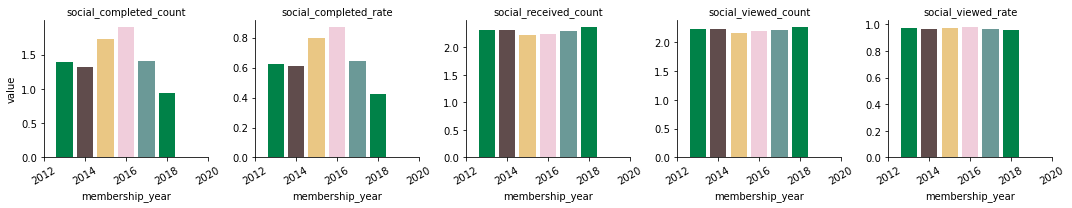

In [71]:
#Analyze offers recieved through Channel - Social media

offer_social =  profile_offer[['customer_id',  
 'social_received_count',
 'social_viewed_count',
 'social_completed_count',
 'social_viewed_rate',
 'social_completed_rate']]


df = plot_data(offer_social ,profile_offer,  groupby = 'gender',palette =4,col_wrap=5,height=3,label_rotation =30)
df = plot_data( offer_social,profile_offer,  groupby = 'age_group',palette =6,col_wrap=5,height=3,label_rotation =30)
df = plot_data( offer_social,profile_offer,  groupby = 'customer_income_range',palette =6,col_wrap=5,height=3,label_rotation =30)
df = plot_data( offer_social,profile_offer,  groupby = 'membership_year',palette =6,col_wrap=5,height=3,label_rotation =30)


### 3. Web

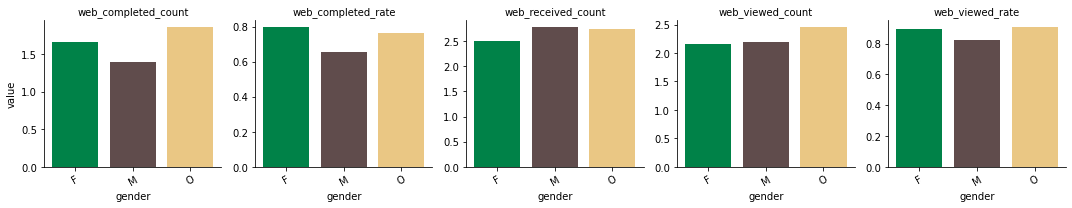

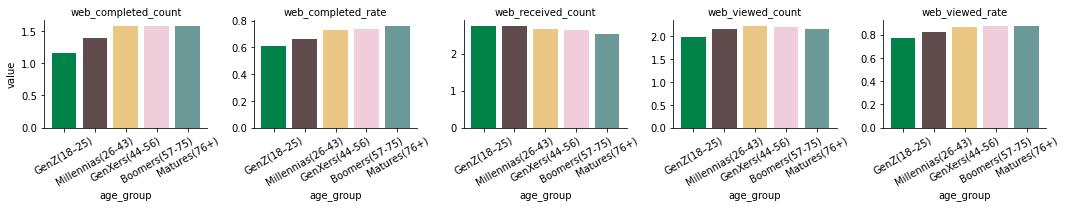

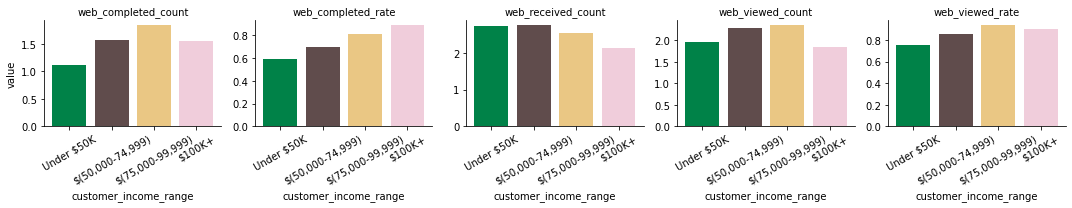

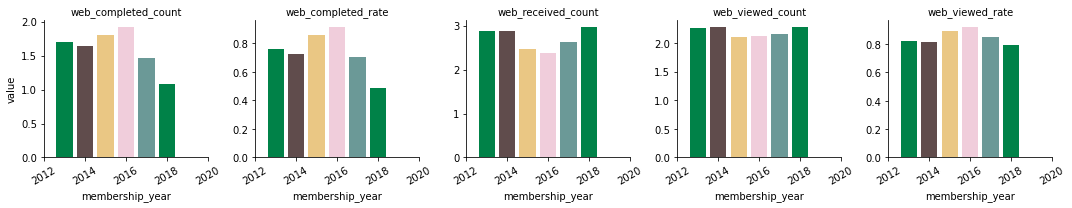

In [72]:
#Analyze offers recieved through Channel - Social Web

offer_web =  profile_offer[['customer_id',  
 'web_received_count',
 'web_viewed_count',
 'web_completed_count',
 'web_viewed_rate',
 'web_completed_rate']]


df = plot_data(offer_web ,profile_offer,  groupby = 'gender',palette =4,col_wrap=5,height=3,label_rotation =30)
df = plot_data( offer_web,profile_offer,  groupby = 'age_group',palette =6,col_wrap=5,height=3,label_rotation =30)
df = plot_data( offer_web,profile_offer,  groupby = 'customer_income_range',palette =6,col_wrap=5,height=3,label_rotation =30)
df = plot_data( offer_web,profile_offer,  groupby = 'membership_year',palette =6,col_wrap=5,height=3,label_rotation =30)
